In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
vaccination_df = pd.read_csv('./India.csv')
vaccination_df

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,India,2021-01-15,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,0,0,0,NaN
1,India,2021-01-16,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350459...,191181,191181,0,NaN
2,India,2021-01-17,"Covaxin, Oxford/AstraZeneca",https://twitter.com/MoHFW_INDIA/status/1350815...,224301,224301,0,NaN
3,India,2021-01-18,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,454049,454049,0,NaN
4,India,2021-01-19,"Covaxin, Oxford/AstraZeneca",https://www.mohfw.gov.in/,674835,674835,0,NaN
...,...,...,...,...,...,...,...,...
438,India,2022-04-11,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://dashboard.cowin.gov.in/,1857308103,995287178,838867091,23153834.0
439,India,2022-04-12,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://dashboard.cowin.gov.in/,1859559964,996097655,840024362,23437947.0
440,India,2022-04-13,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://dashboard.cowin.gov.in/,1860601312,996471455,840565591,23564266.0
441,India,2022-04-14,"Covaxin, Oxford/AstraZeneca, Sputnik V",https://dashboard.cowin.gov.in/,1862055068,996934800,841424423,23695845.0


In [4]:
death_df = pd.read_csv('daily-covid-cases-deaths.csv')
death_df

,Entity,Code,Day,Daily new confirmed cases of COVID-19,Daily new confirmed deaths due to COVID-19
0,Afghanistan,AFG,2020-02-24,5.0,NaN
1,Afghanistan,AFG,2020-02-25,0.0,NaN
2,Afghanistan,AFG,2020-02-26,0.0,NaN
3,Afghanistan,AFG,2020-02-27,0.0,NaN
4,Afghanistan,AFG,2020-02-28,0.0,NaN
...,...,...,...,...,...
176298,Zimbabwe,ZWE,2022-04-14,48.0,2.0
176299,Zimbabwe,ZWE,2022-04-15,29.0,0.0
176300,Zimbabwe,ZWE,2022-04-16,0.0,0.0
176301,Zimbabwe,ZWE,2022-04-17,41.0,1.0


In [5]:
death_df = death_df[death_df['Entity']=='India']

In [15]:
vaccination_df.columns

Index(['location', 'date', 'vaccine', 'source_url', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters'],
      dtype='object')

## Visualization of daily vaccination data

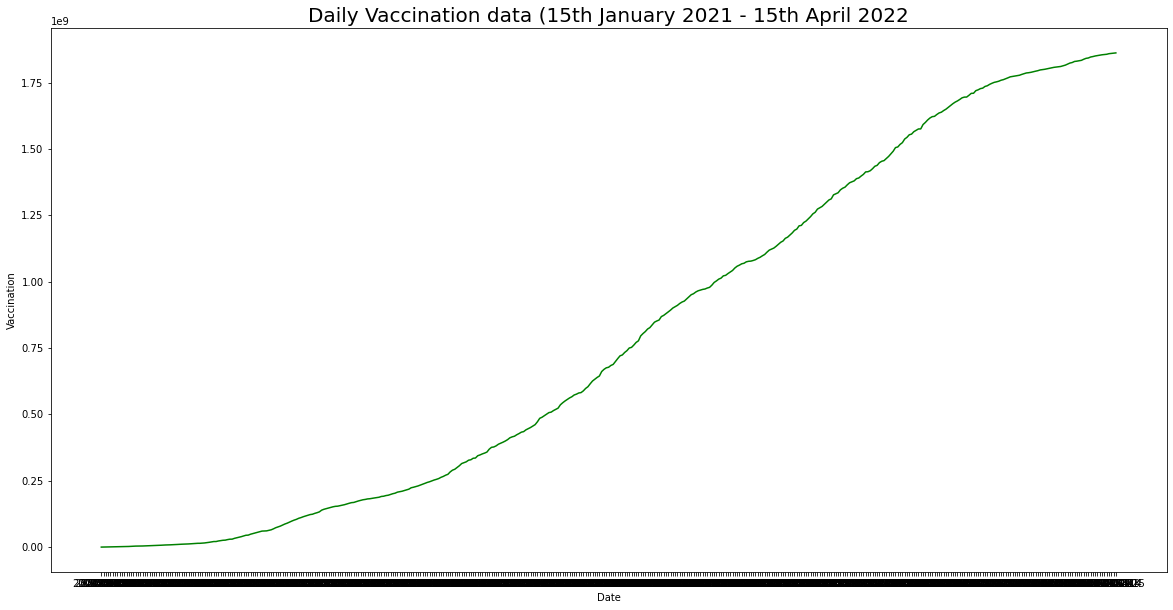

In [6]:
plt.figure(figsize=(20,10))
plt.plot(vaccination_df['date'], vaccination_df['total_vaccinations'], color = 'g')
# plt.xticks(rotation = 25)
plt.xlabel('Date')
plt.ylabel('Vaccination')
plt.title('Daily Vaccination data (15th January 2021 - 15th April 2022', fontsize = 20)
plt.show()

In [7]:
death_df.isna().sum()

Entity                                         0
Code                                           0
Day                                            0
Daily new confirmed cases of COVID-19          0
Daily new confirmed deaths due to COVID-19    43
dtype: int64

In [8]:
death_df = death_df.dropna()

In [9]:
death_df.isna().sum()

Entity                                        0
Code                                          0
Day                                           0
Daily new confirmed cases of COVID-19         0
Daily new confirmed deaths due to COVID-19    0
dtype: int64

In [10]:
death_df.columns = ['Entity', 'Code', 'Day', 'cases','deaths']

# Visualization of daily deaths data

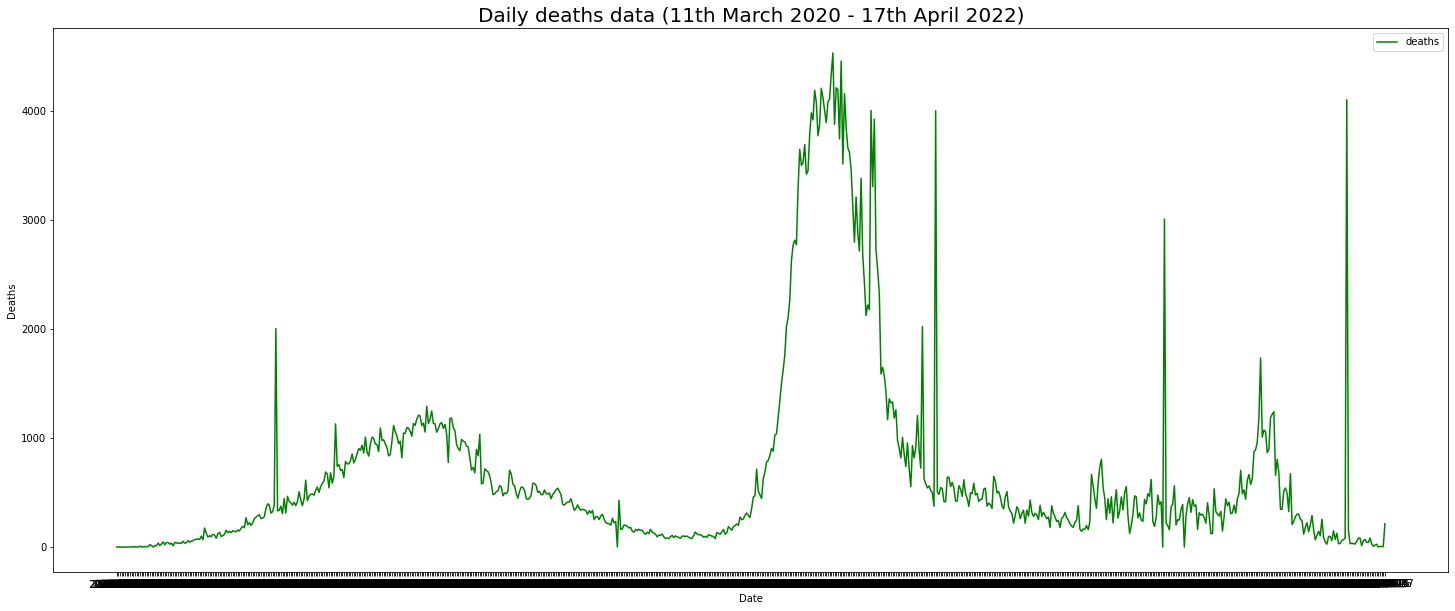

In [12]:
plt.figure(figsize=(25,10))
plt.plot(death_df['Day'], death_df['deaths'], color = 'g', label='deaths')
# plt.plot(vaccination_df['date'], vaccination_df['total_vaccinations'], color = 'r', label = 'vaccination')
plt.xticks(rotation = 1)
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Daily deaths data (11th March 2020 - 17th April 2022)', fontsize = 20)
plt.legend()
plt.show()

# Visualization of daily cases data

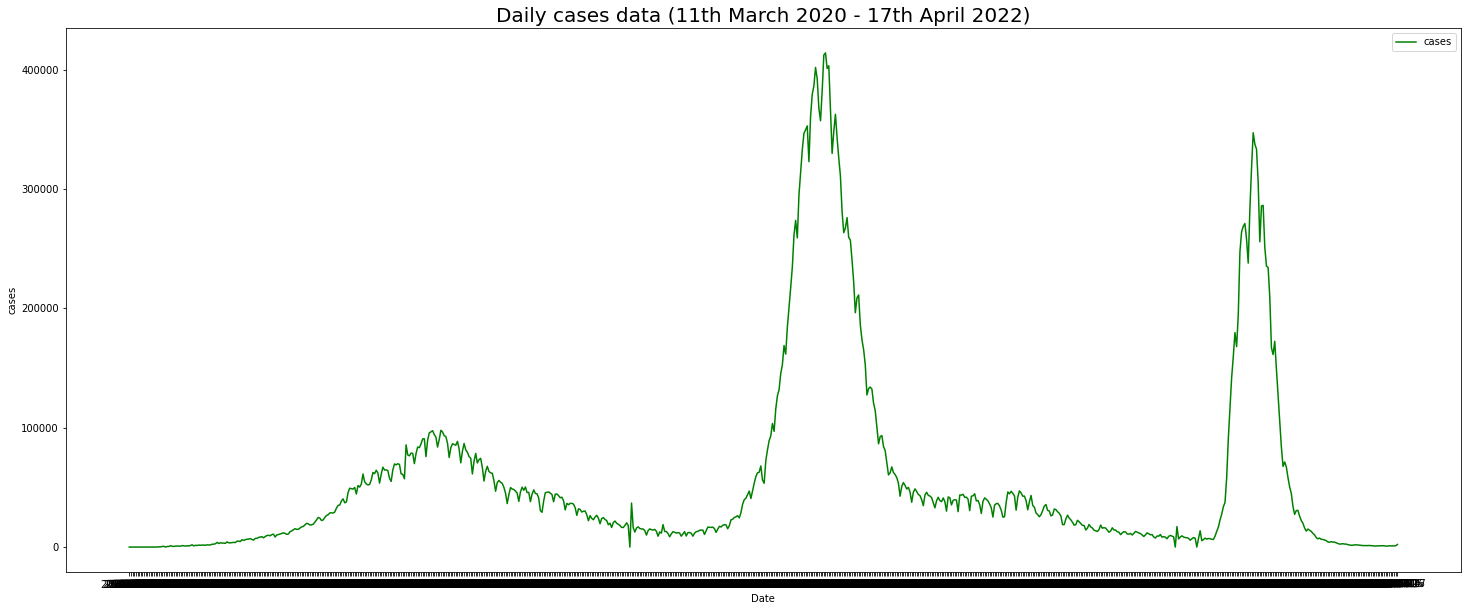

In [13]:
plt.figure(figsize=(25,10))
plt.plot(death_df['Day'], death_df['cases'], color = 'g', label='cases')
# plt.plot(vaccination_df['date'], vaccination_df['total_vaccinations'], color = 'r', label = 'vaccination')
plt.xticks(rotation = 1)
plt.xlabel('Date')
plt.ylabel('cases')
plt.title('Daily cases data (11th March 2020 - 17th April 2022)', fontsize = 20)
plt.legend()
plt.show()

## Vaccination vs deaths visualizations

In [15]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
start_days = ['15', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01', '01']
end_days = ['31', '28', '31', '30', '31', '30', '31', '31', '30', '31', '30', '31']
months_index = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [17]:
def draw_graph(X, Y, xlabel, ylabel, title, color_, label_):
  plt.figure(figsize=(25,10))
  plt.plot(X, Y, color = color_, label= label_)
  # plt.plot(jan_vaccination['date'], jan_vaccination['total_vaccinations'], color = 'r', label = label_)
  plt.xticks(rotation = 1)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title, fontsize = 20)
  plt.legend()
  plt.show()

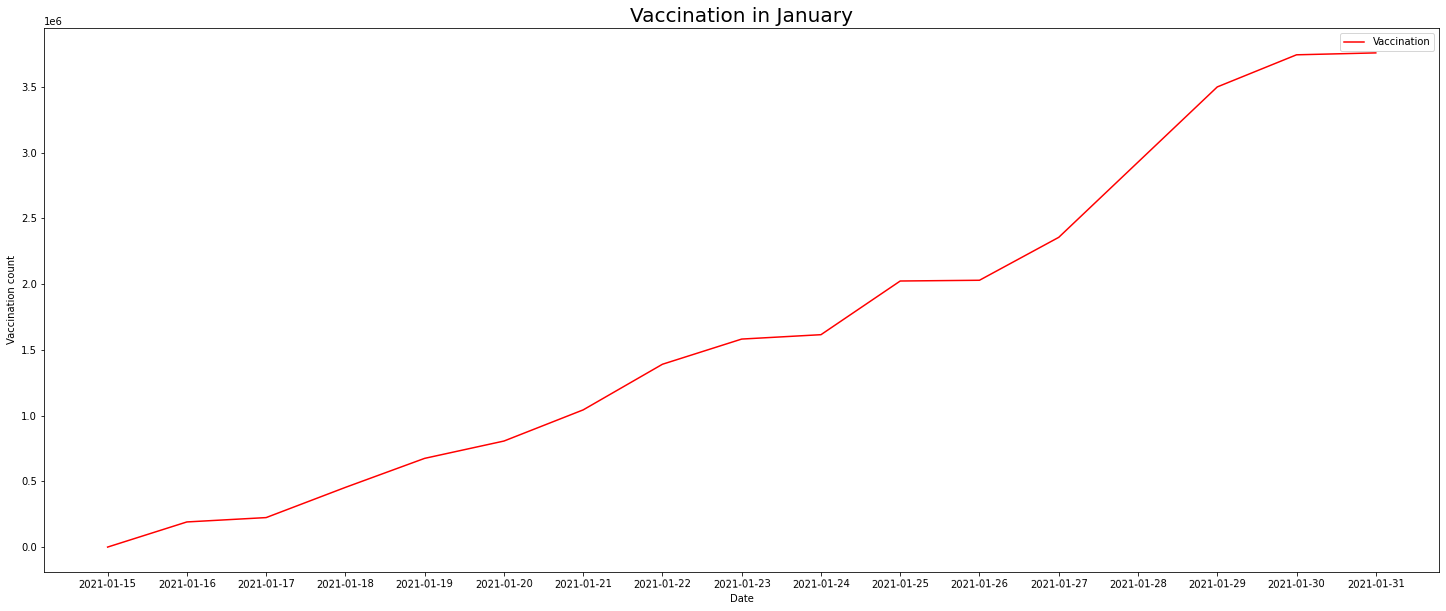

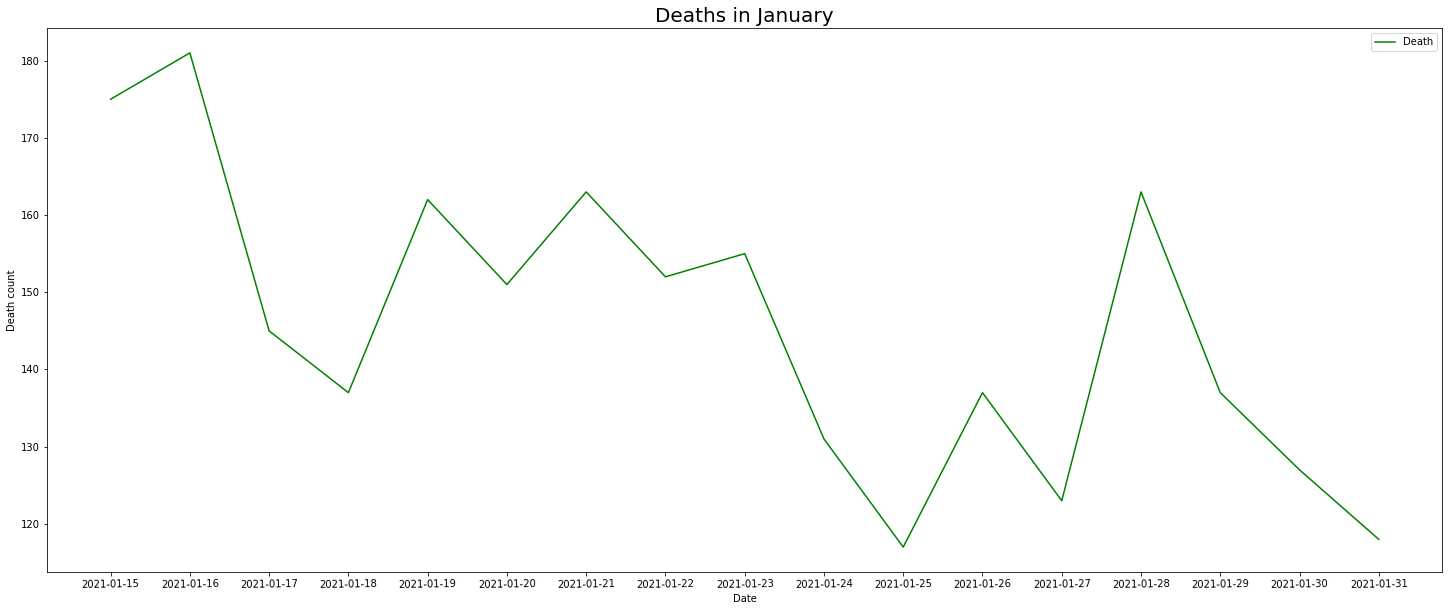

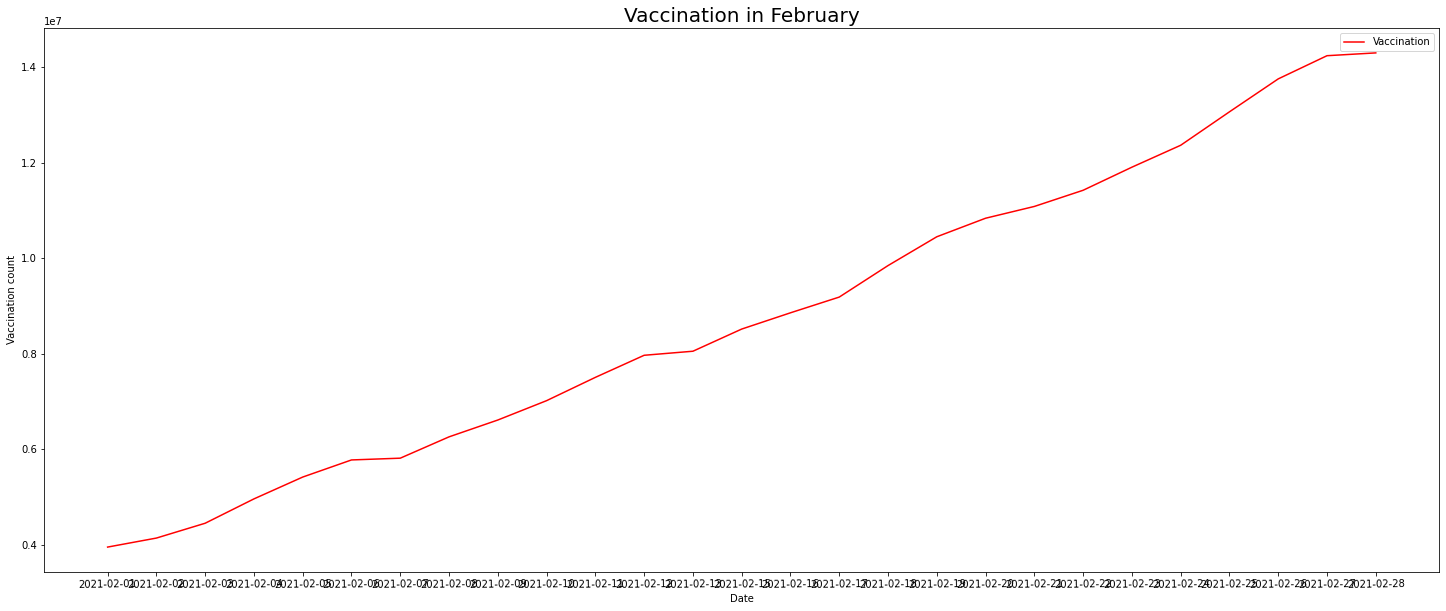

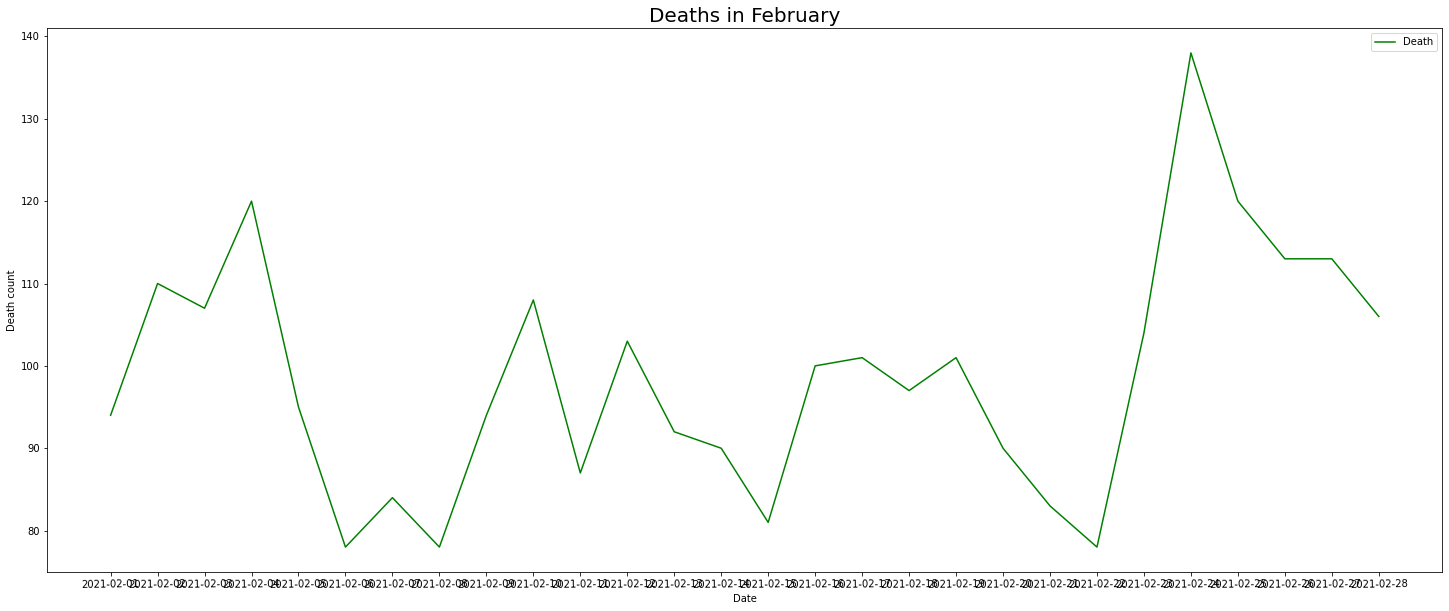

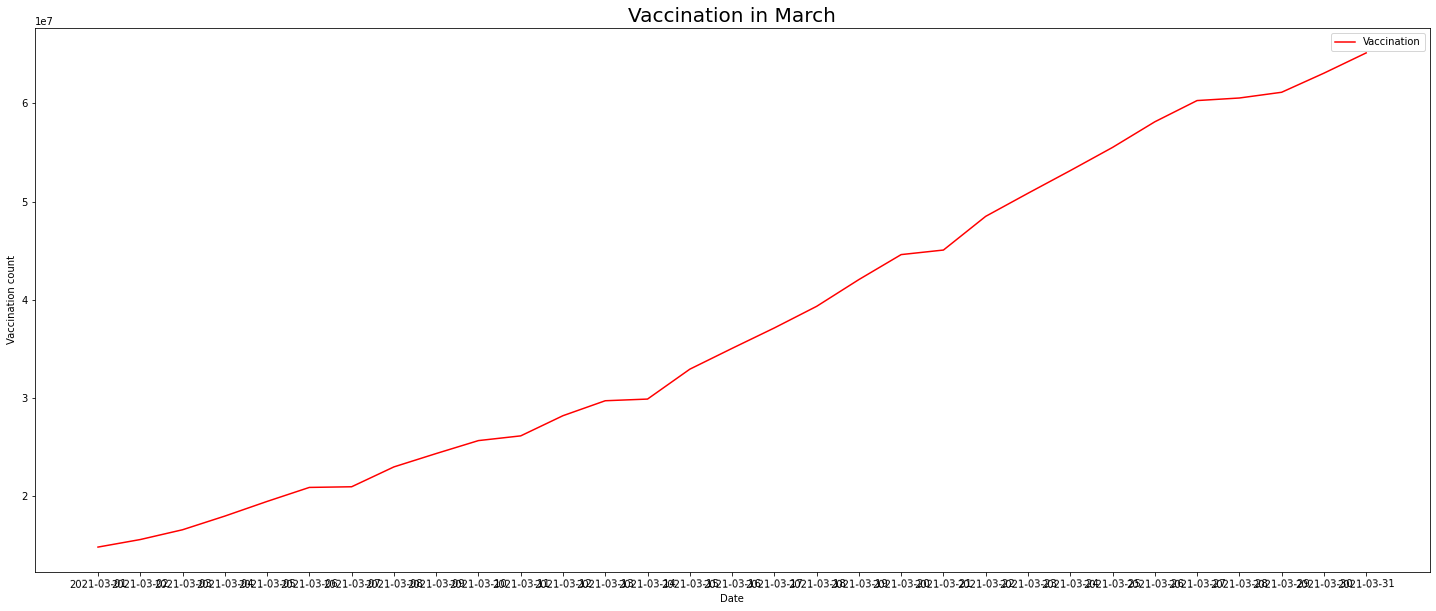

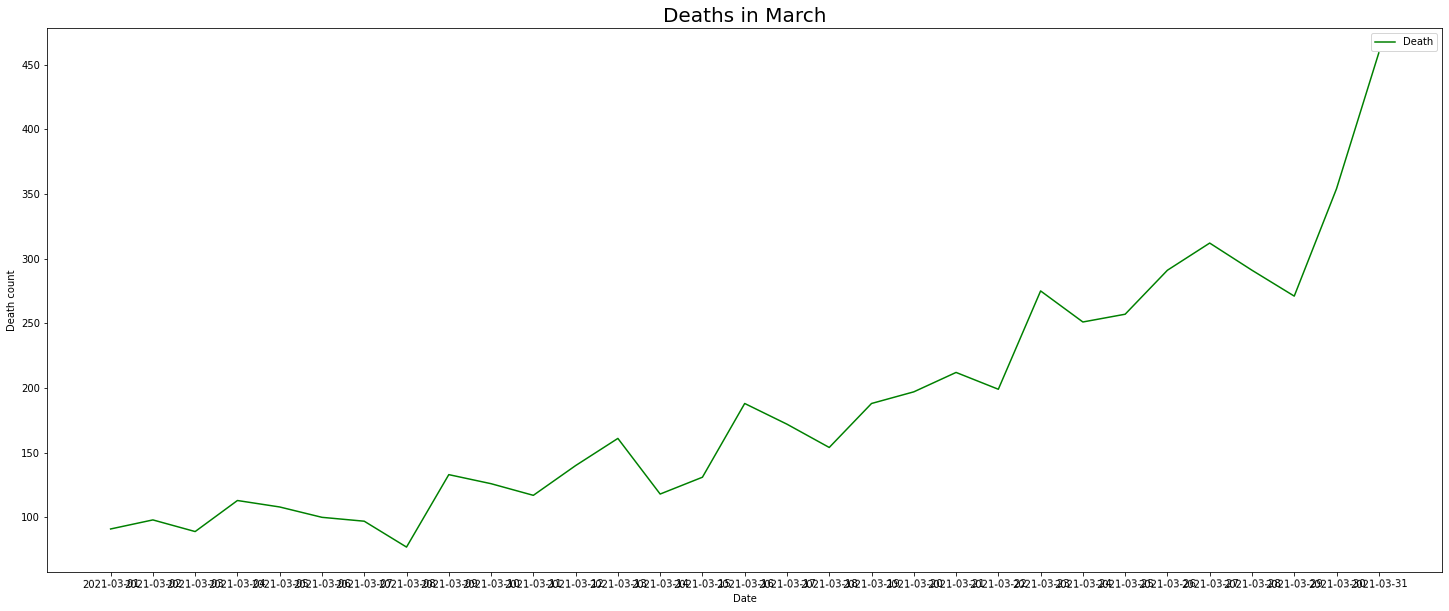

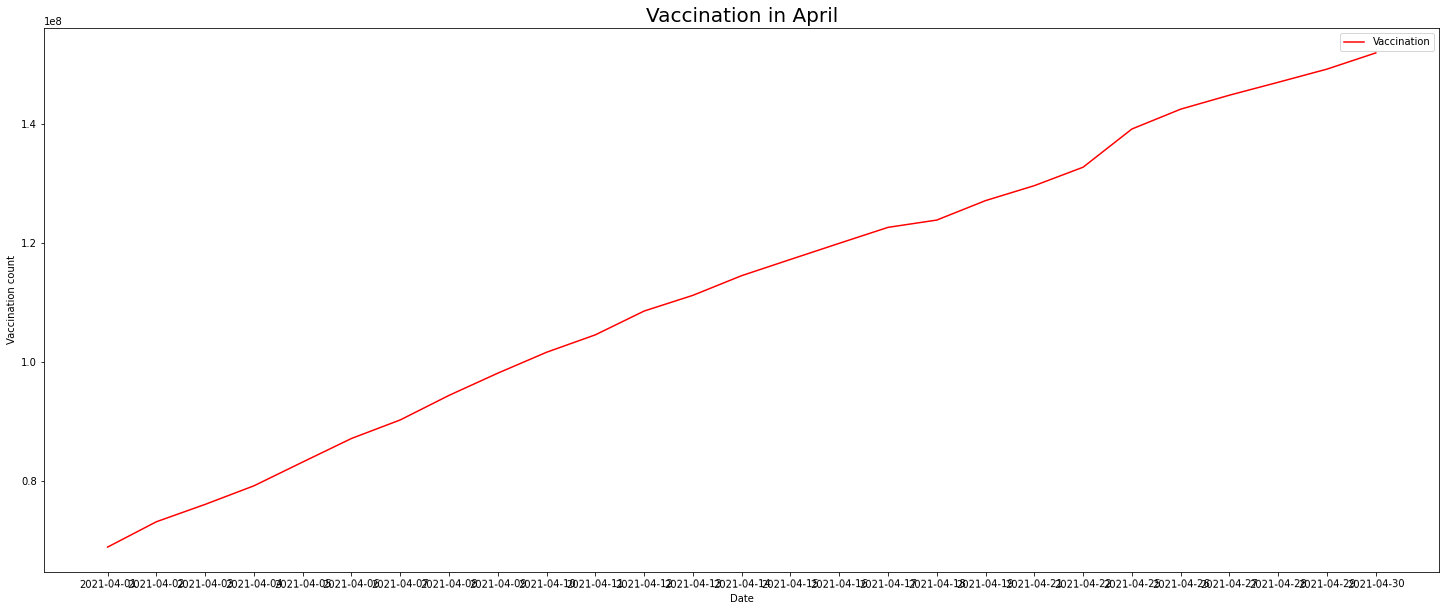

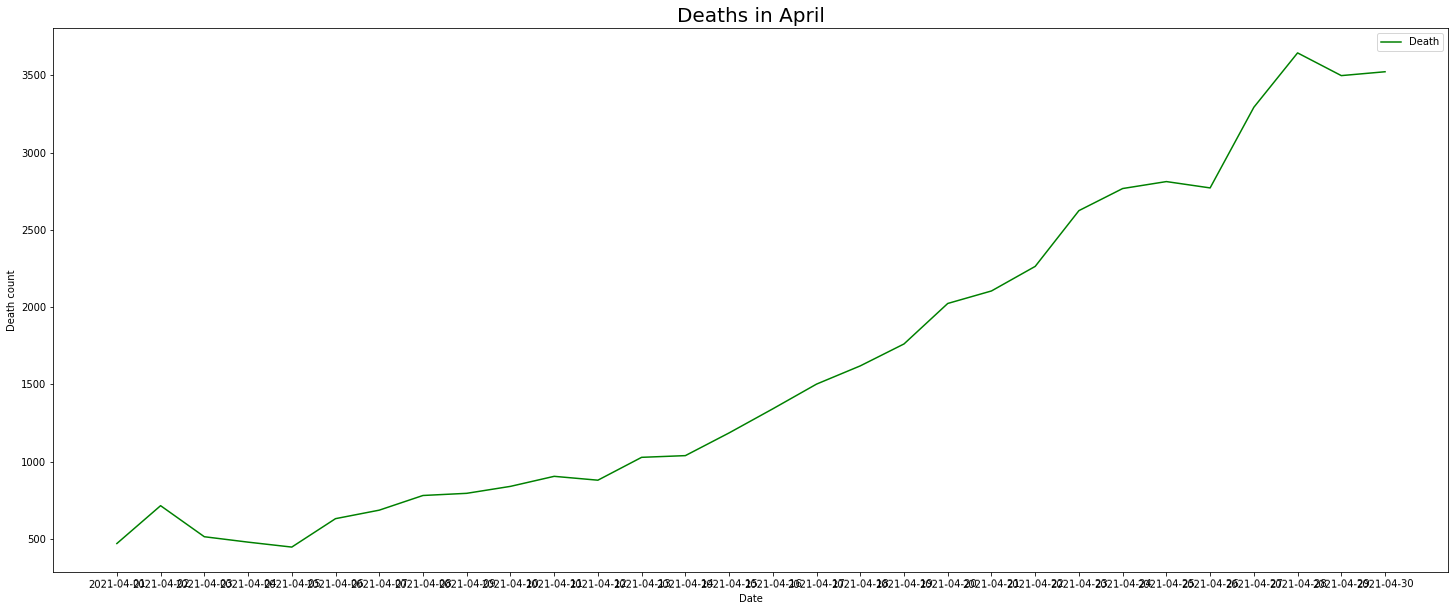

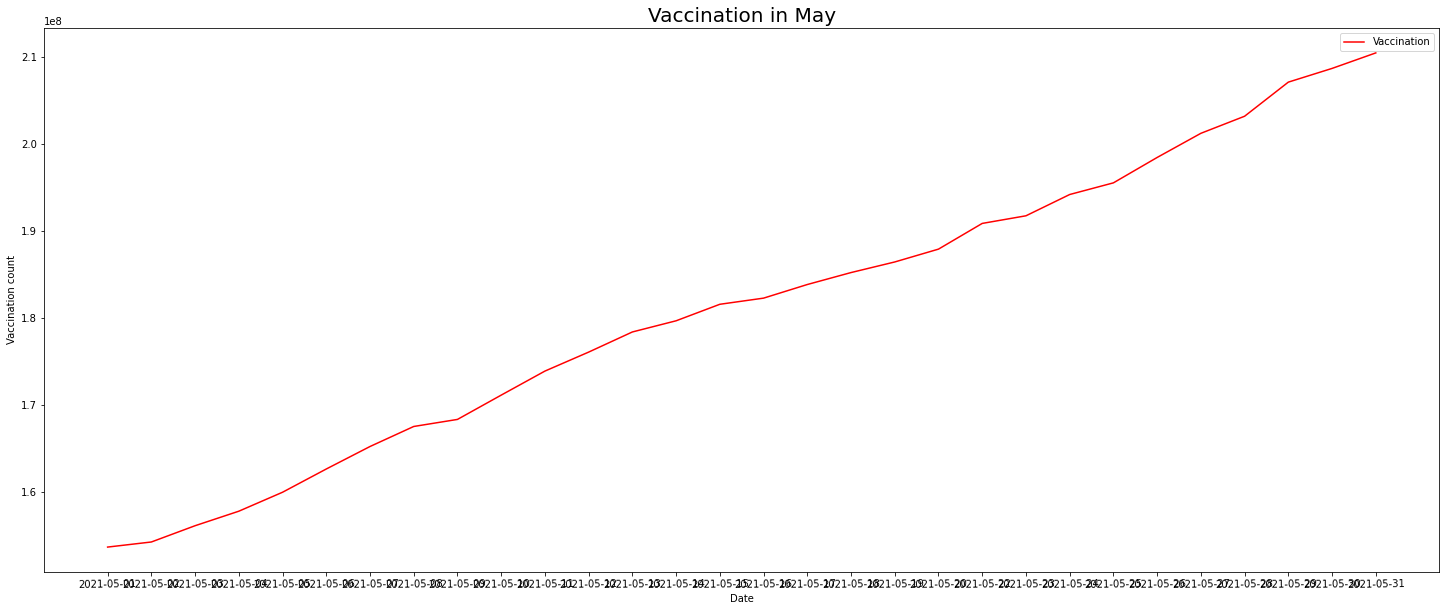

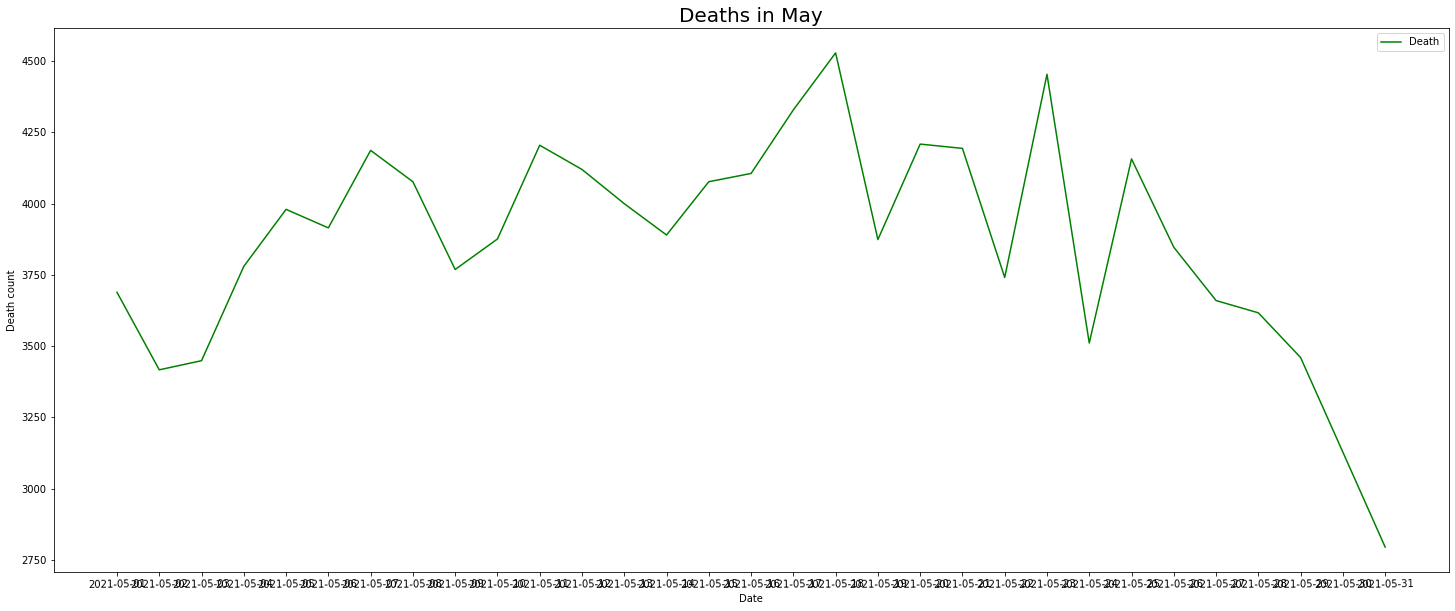

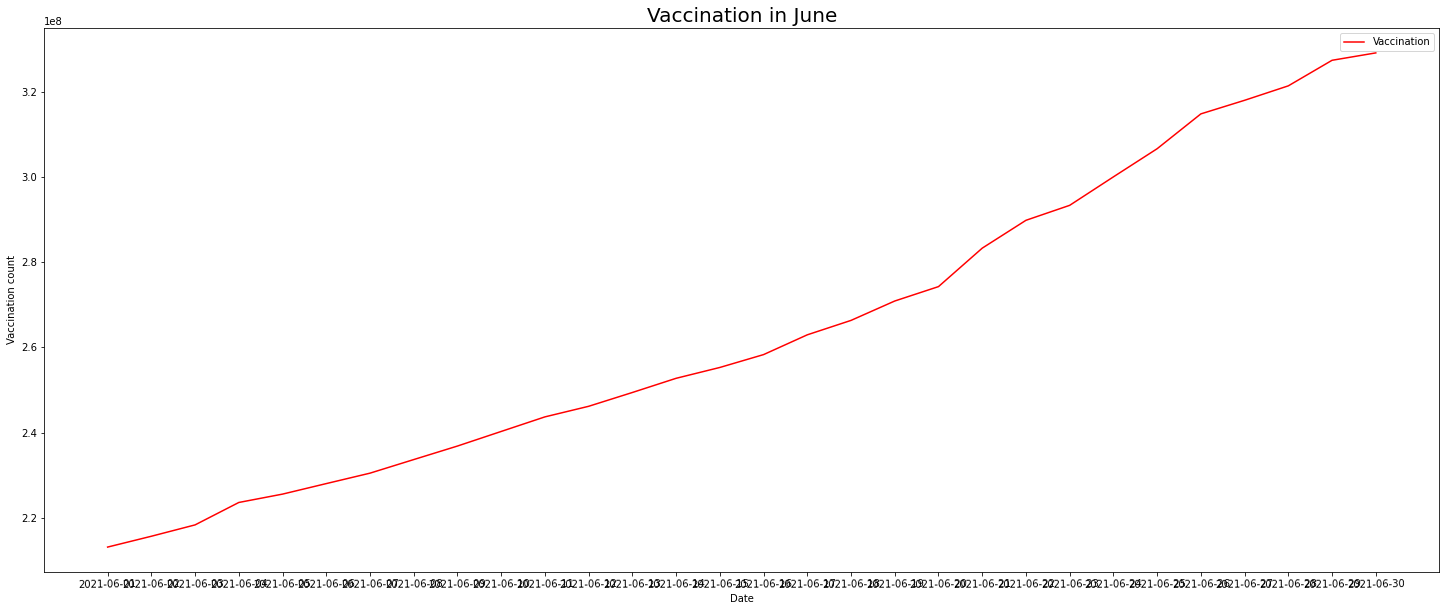

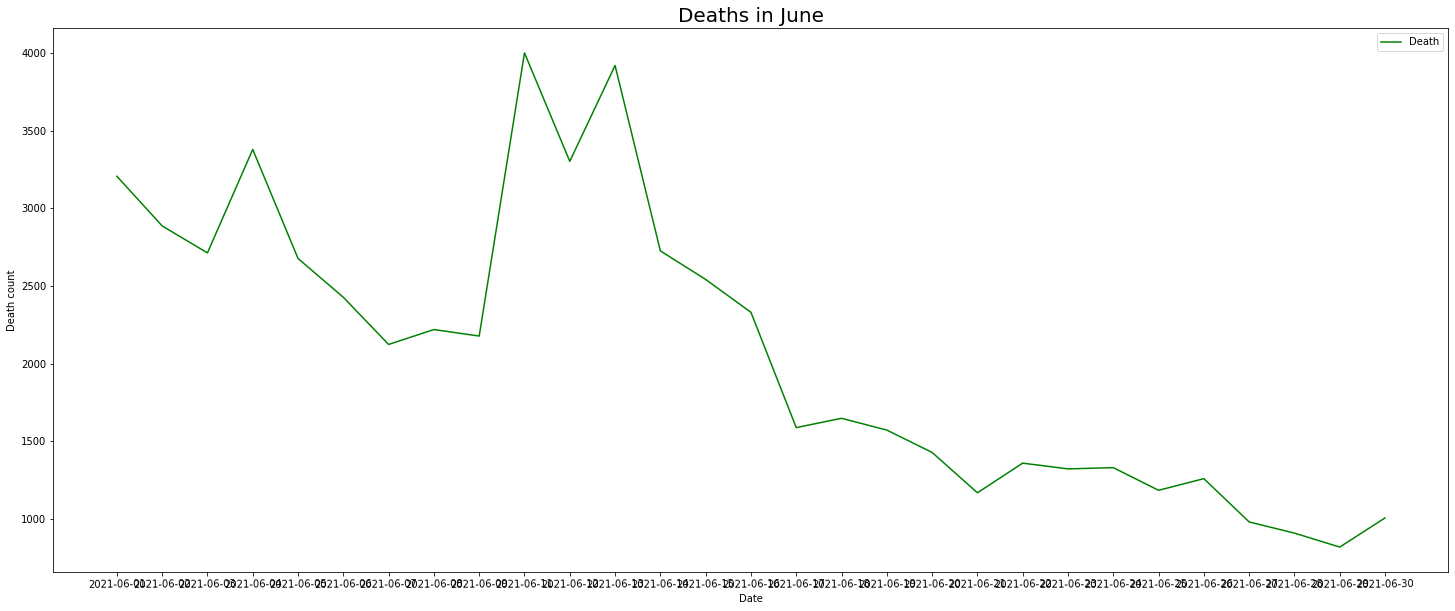

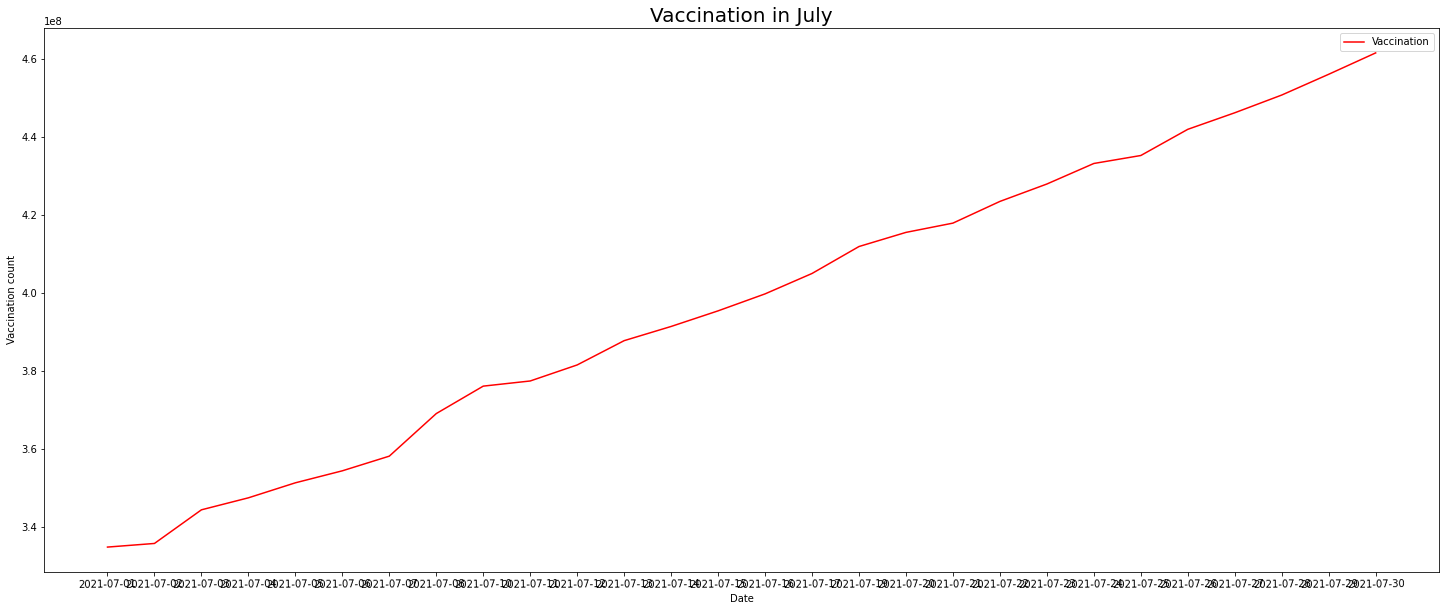

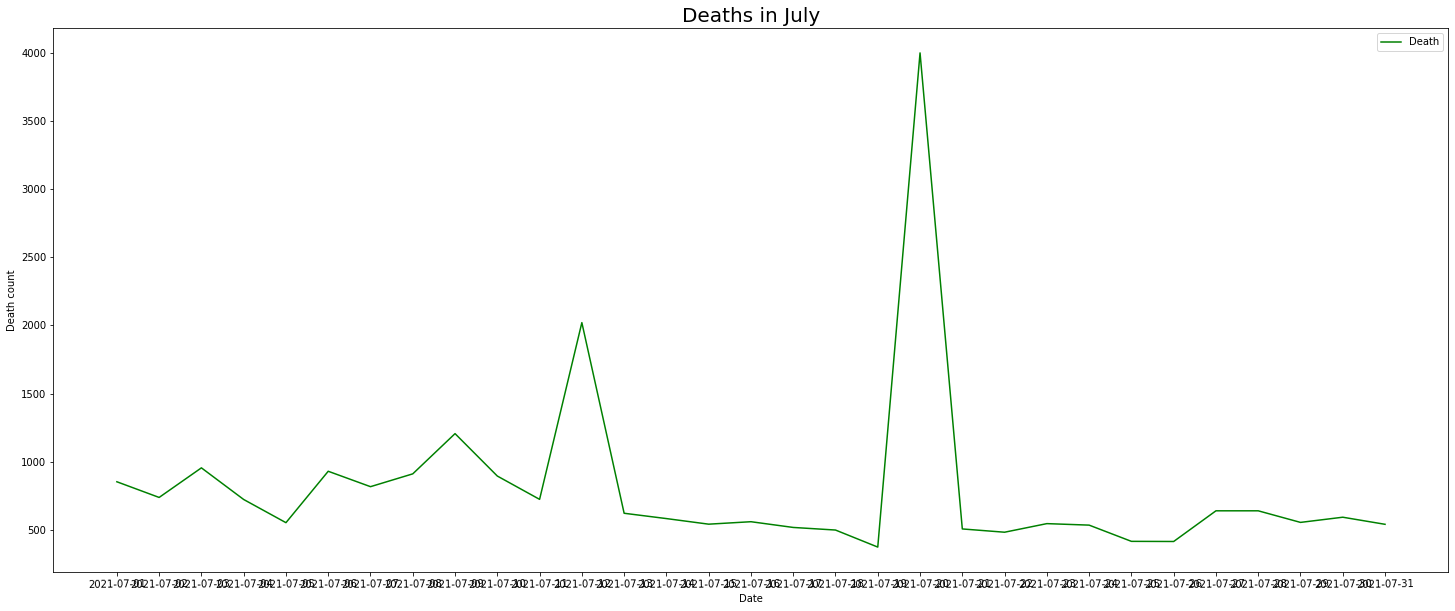

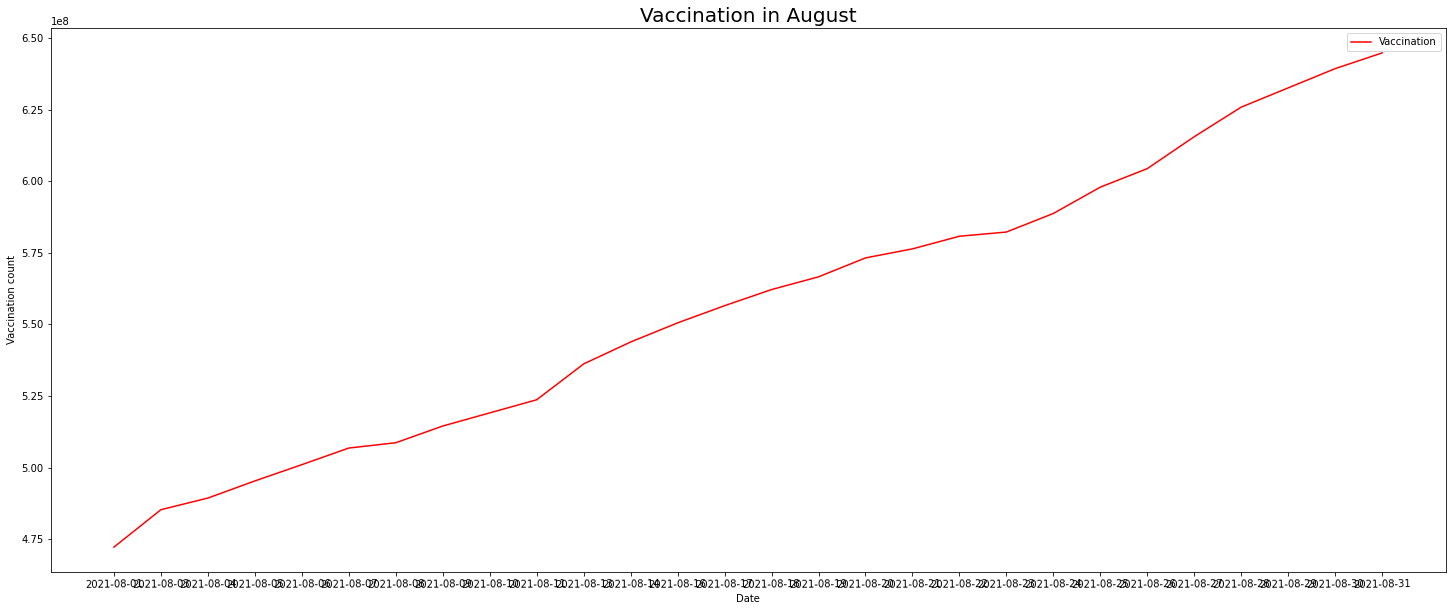

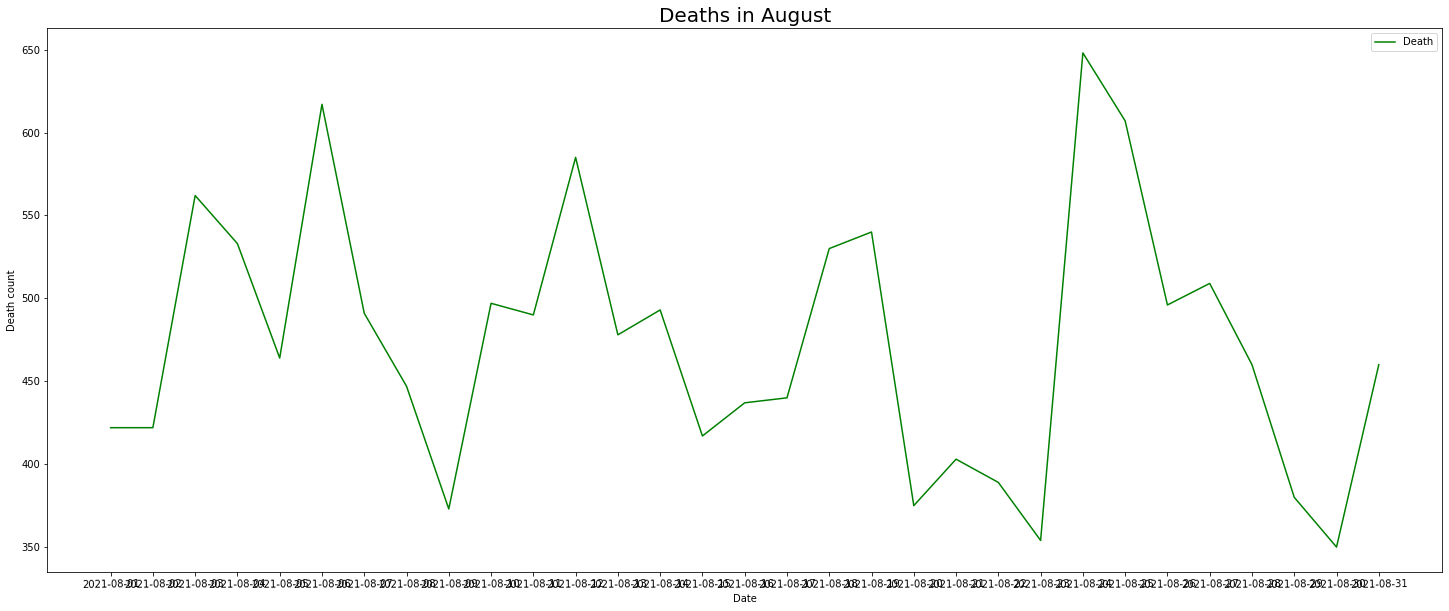

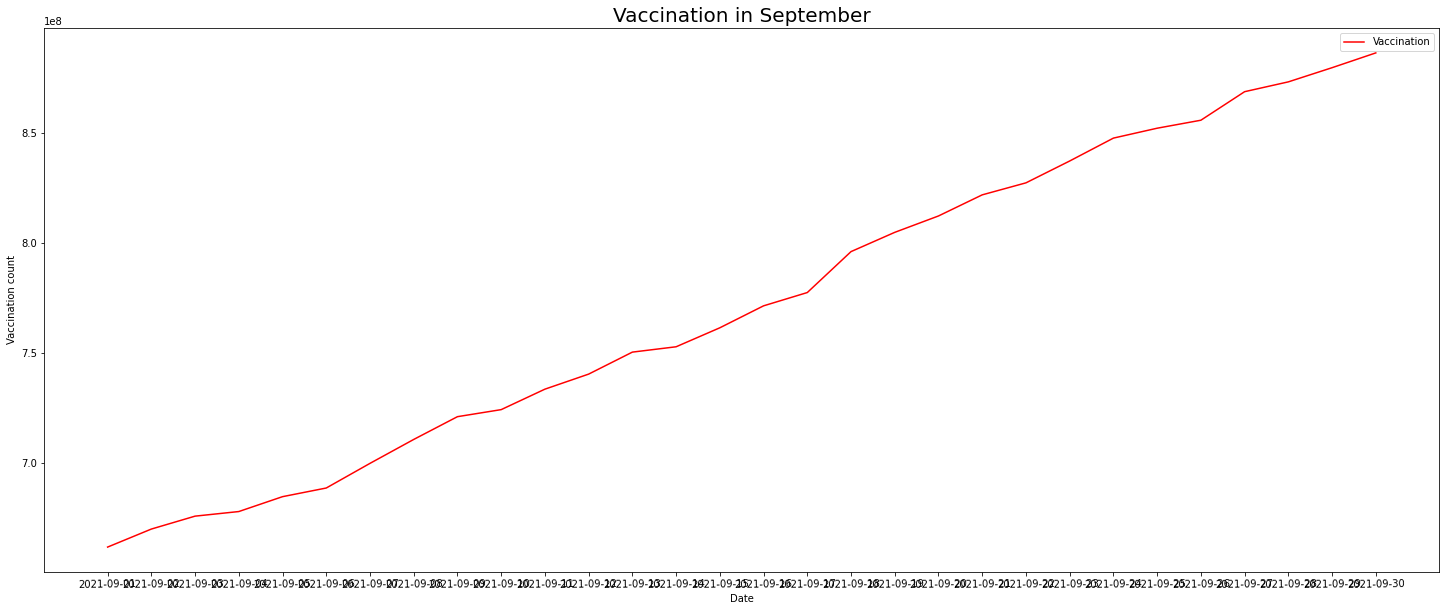

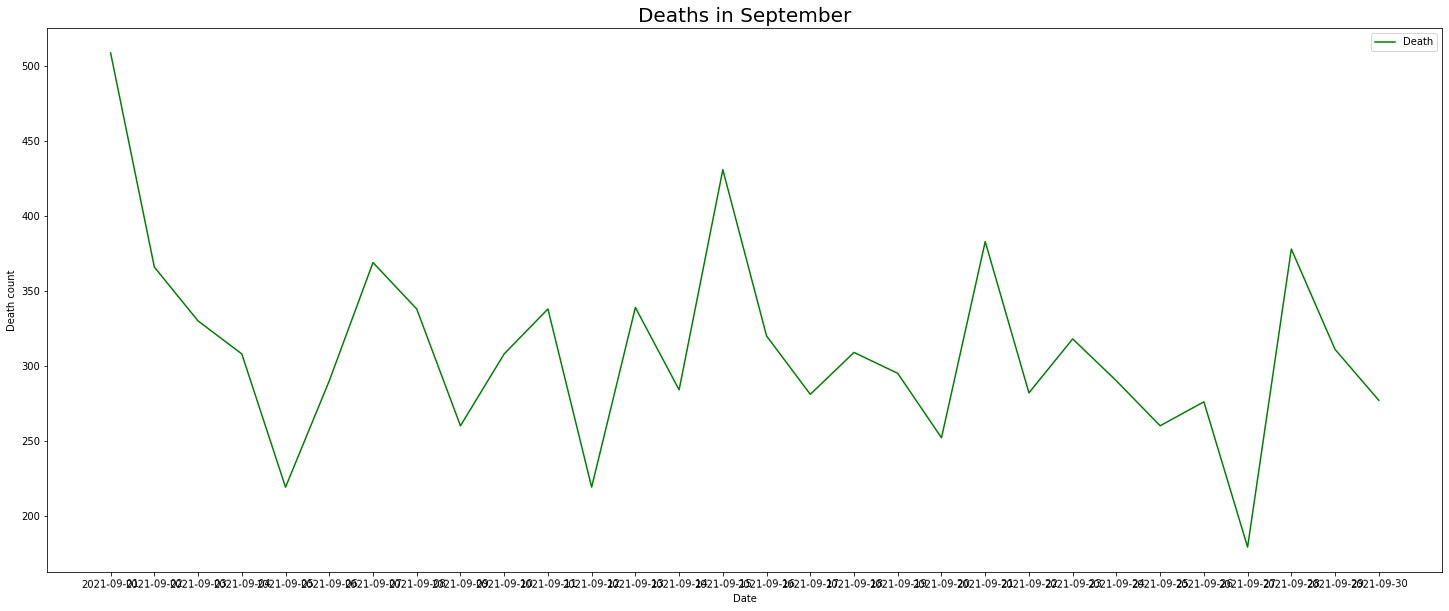

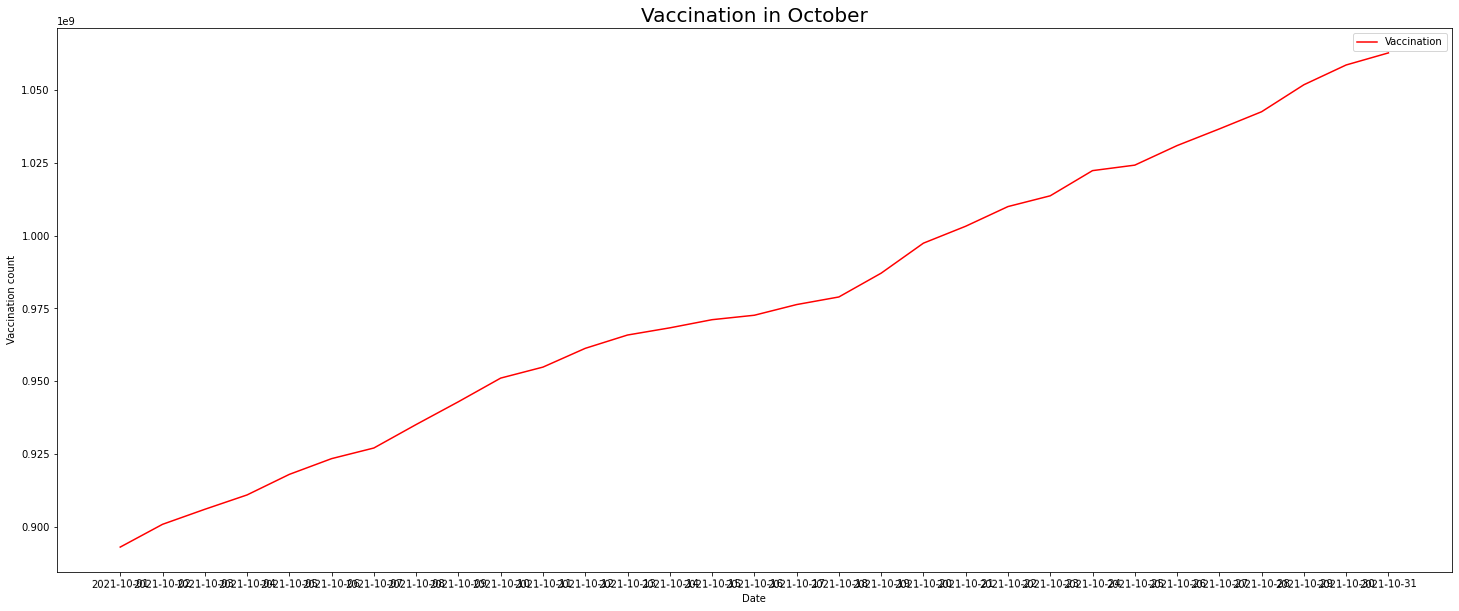

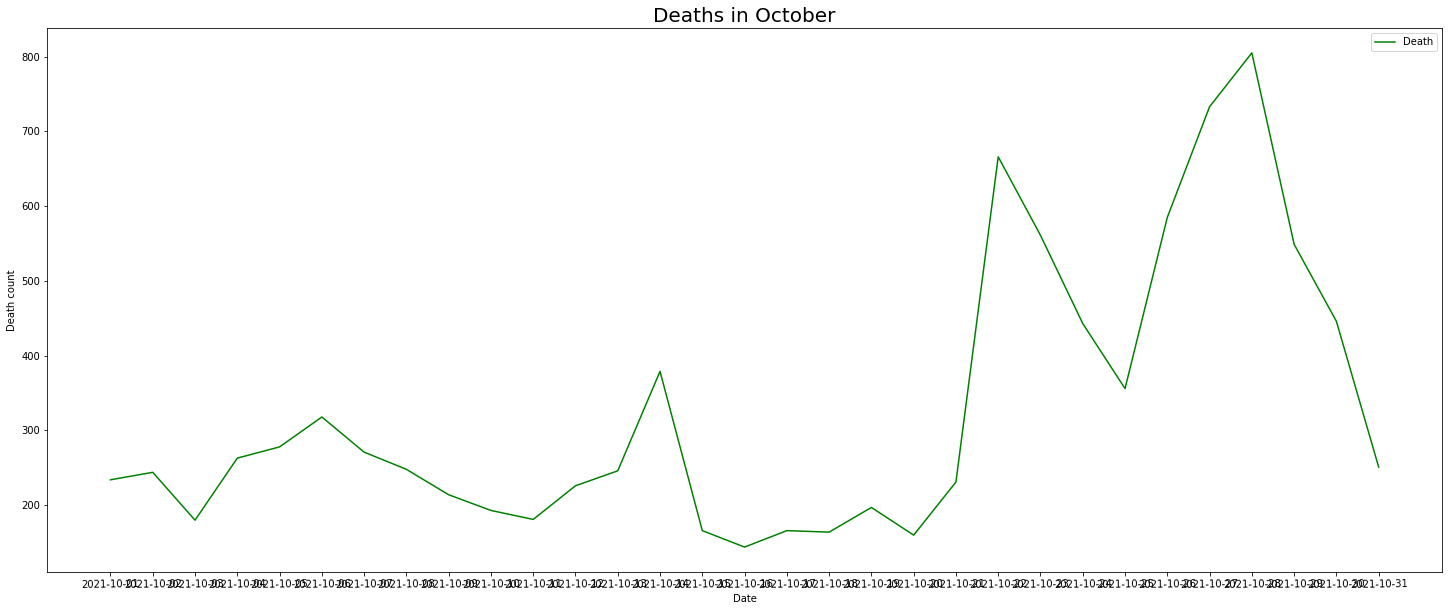

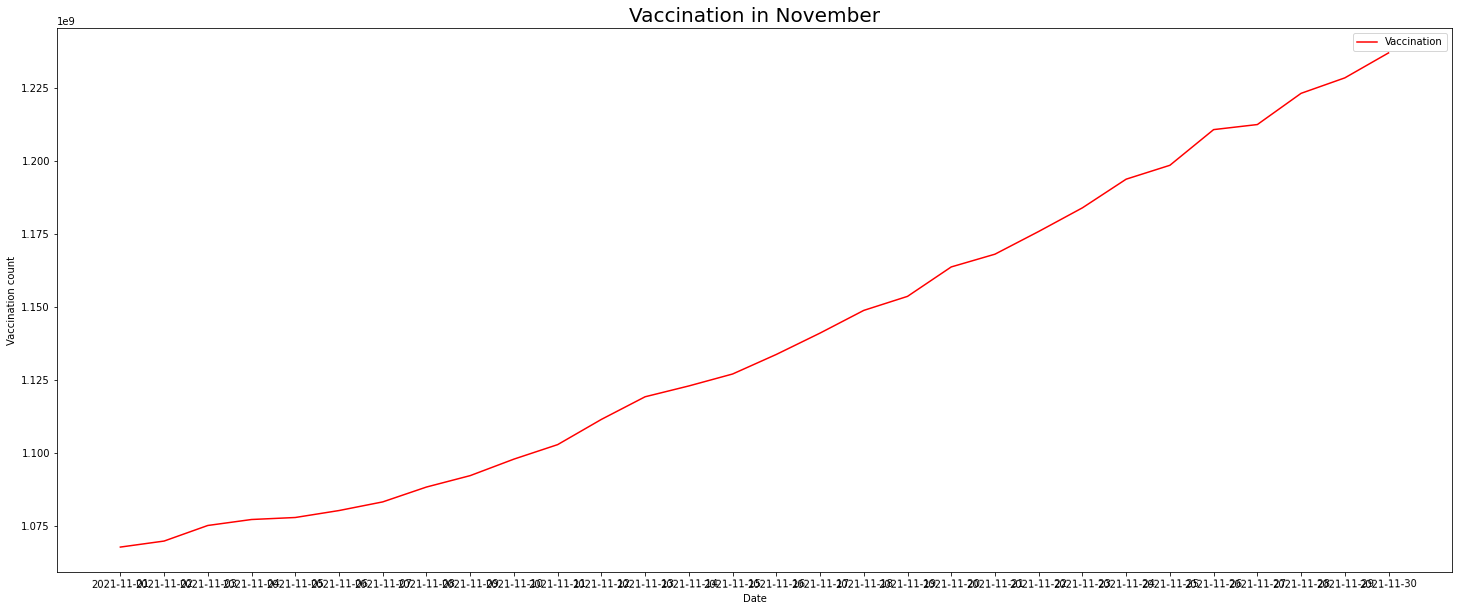

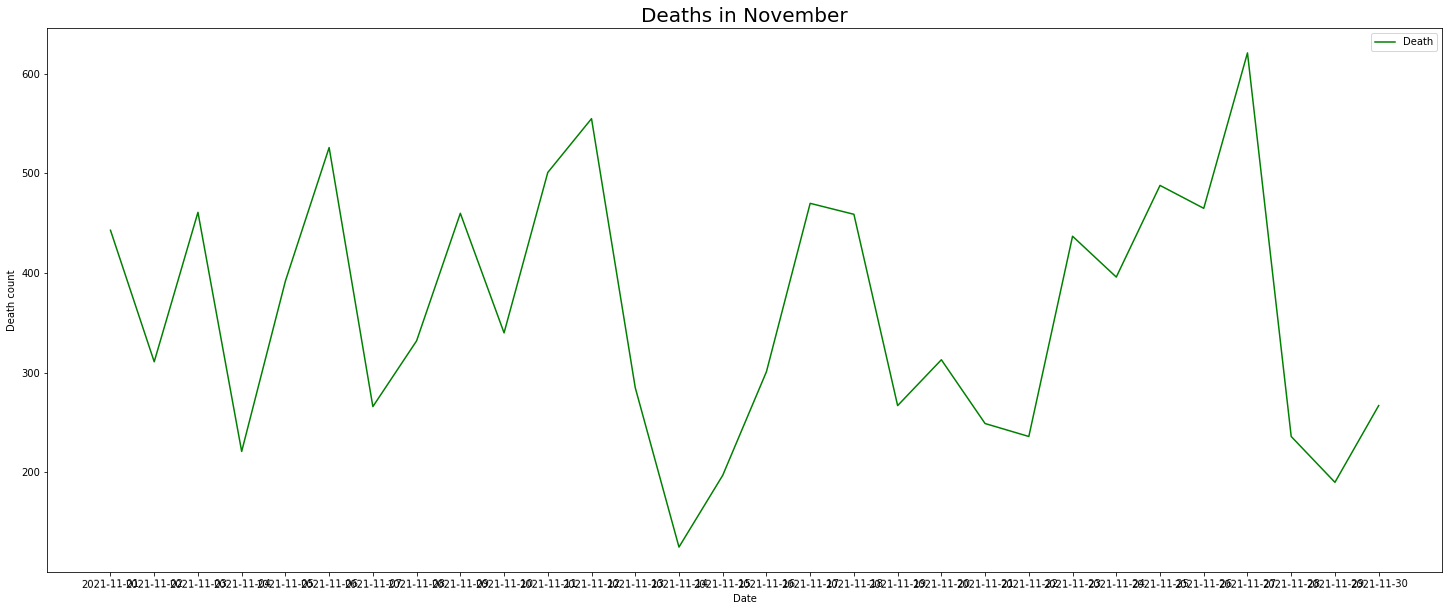

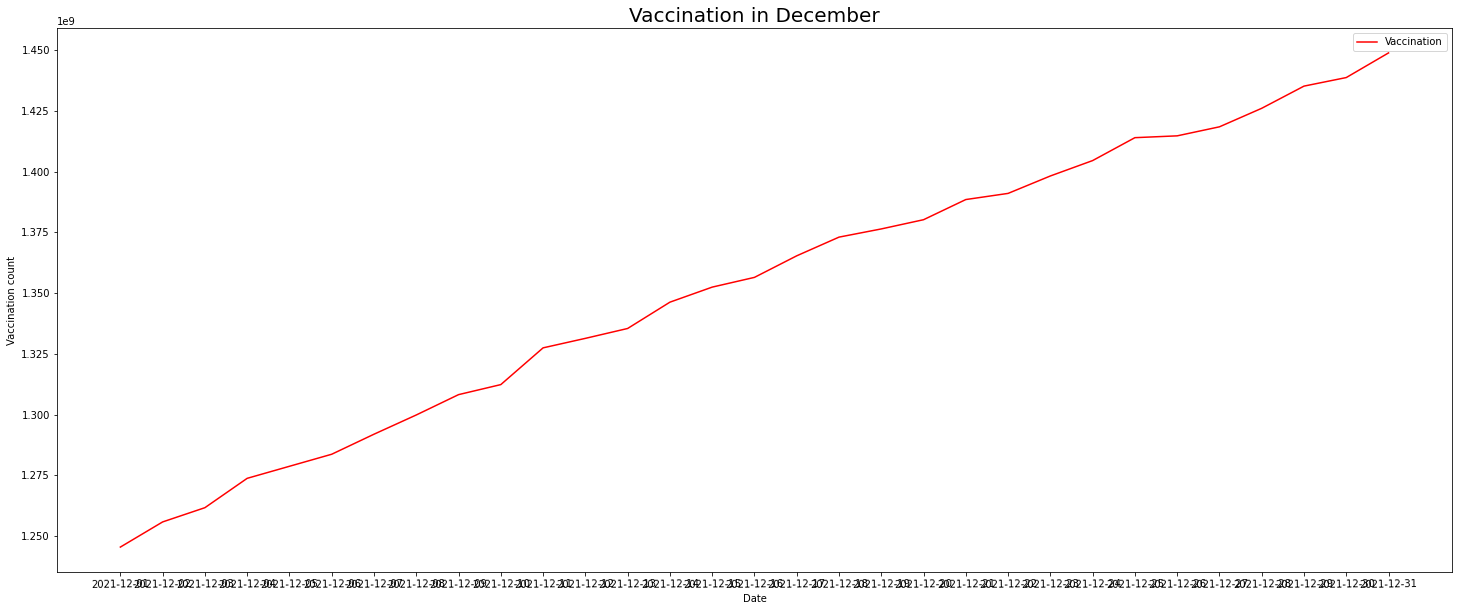

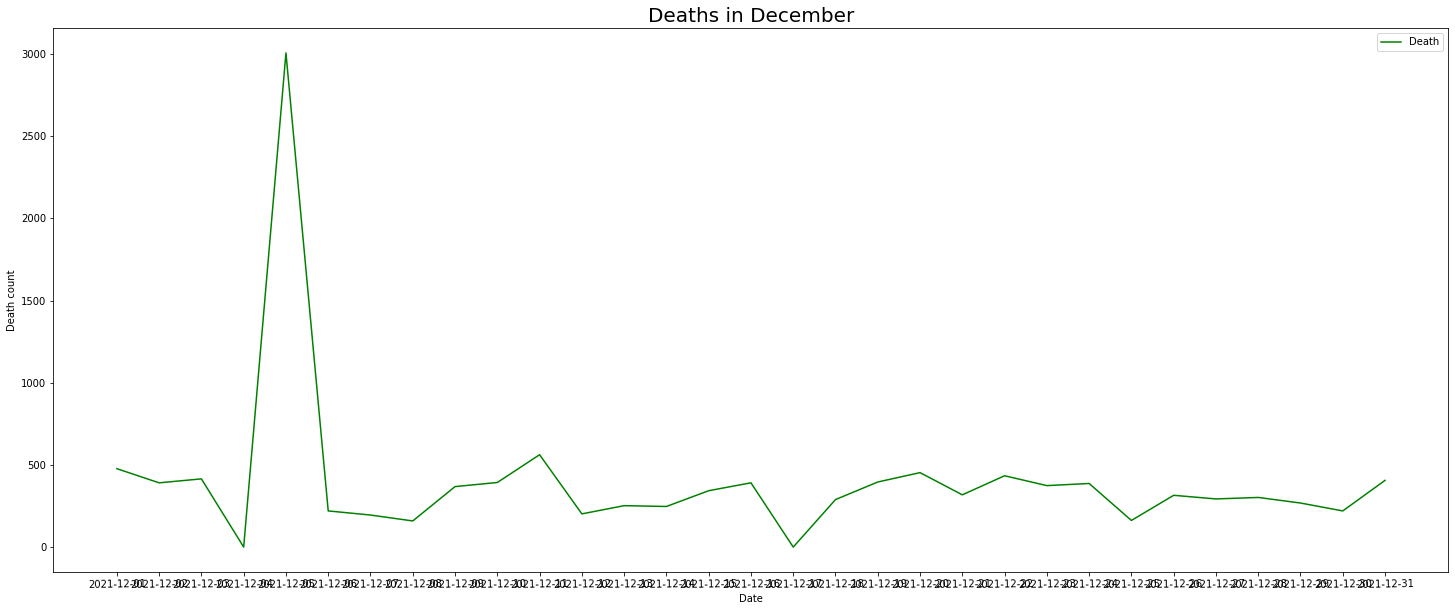

In [32]:
for i in range(12):
  start_date = str(2021) + '-' + months_index[i] + '-' + str(start_days[i])
  end_date = str(2021) + '-' + months_index[i] + '-' + str(end_days[i])
  month_deaths = death_df[(death_df['Day'] >= start_date) & (death_df['Day'] <= end_date)]
  month_vaccination = vaccination_df[(vaccination_df['date'] >= start_date) & (vaccination_df['date'] <= end_date)]
  draw_graph(month_vaccination['date'], month_vaccination['total_vaccinations'], 'Date', 'Vaccination count', 'Vaccination in ' + months[i], 'r', 'Vaccination')
  draw_graph(month_deaths['Day'], month_deaths['deaths'], 'Date', 'Death count', 'Deaths in ' + months[i], 'g', 'Death')

## Vaccination vs cases visualization

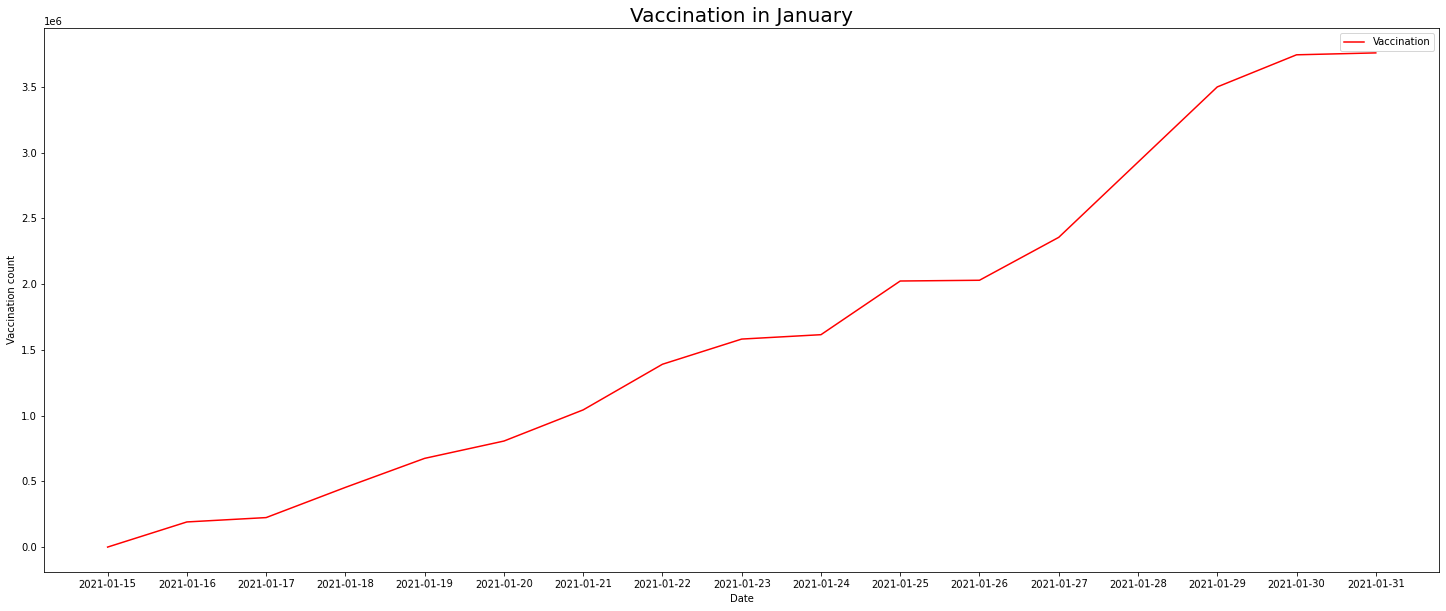

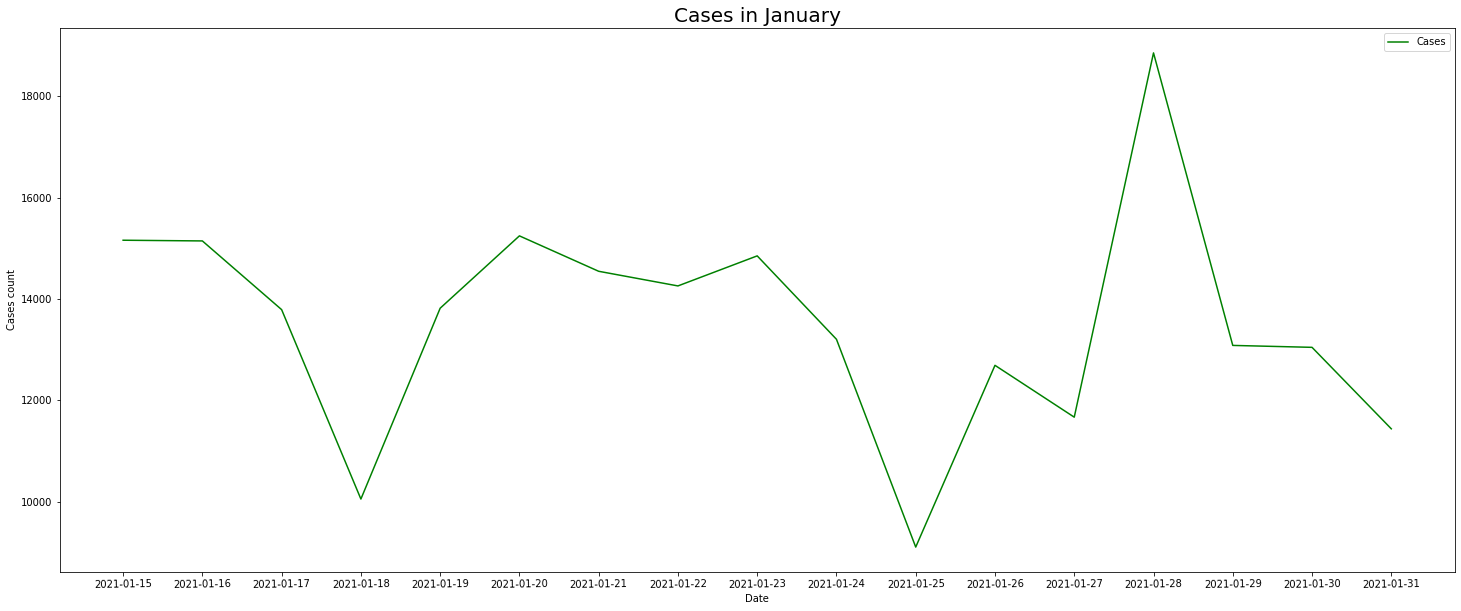

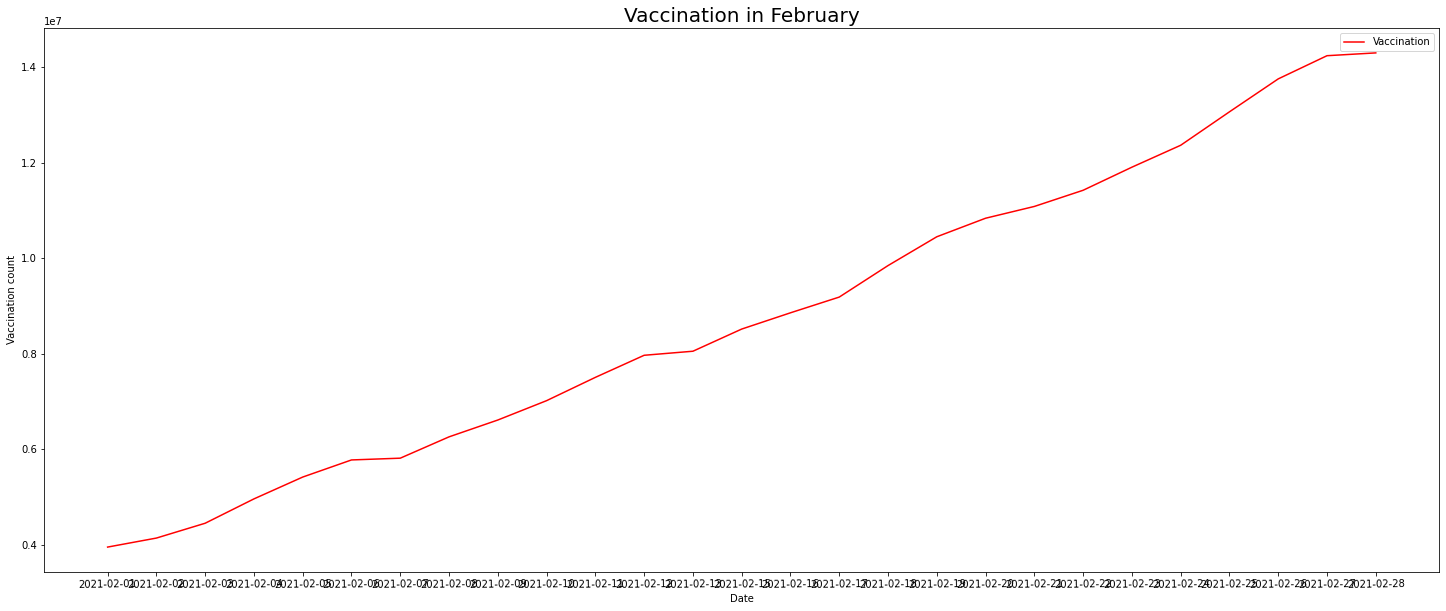

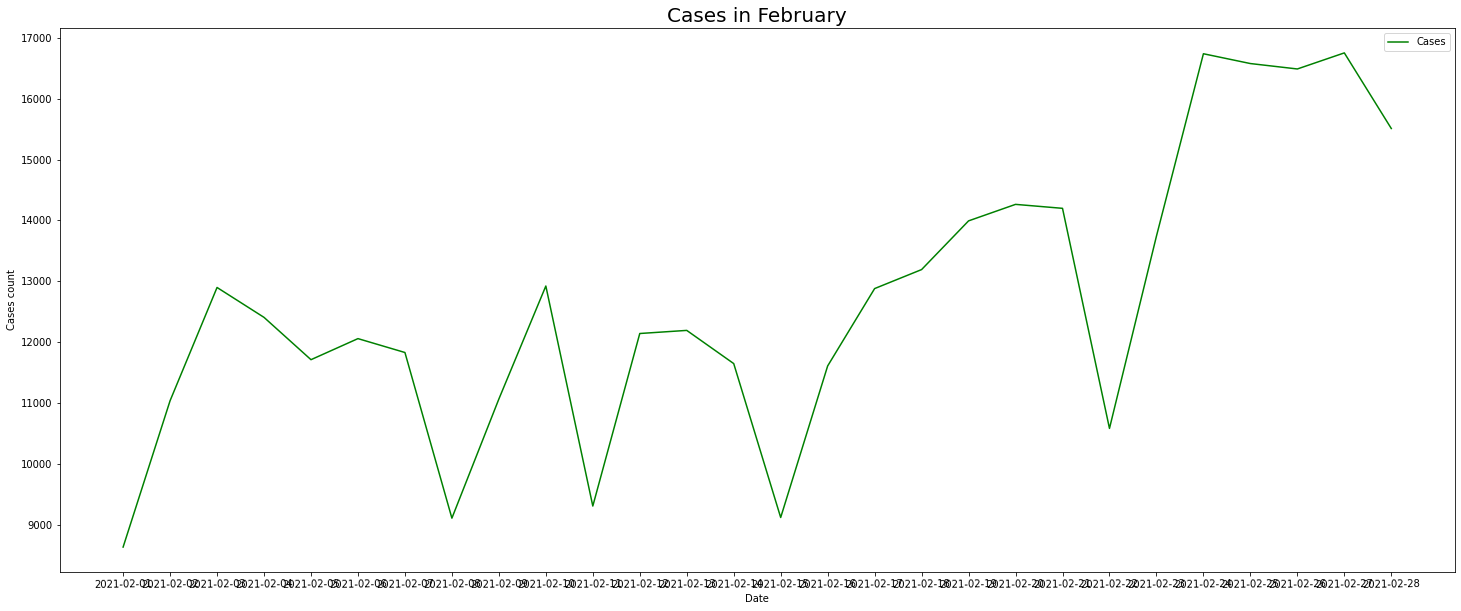

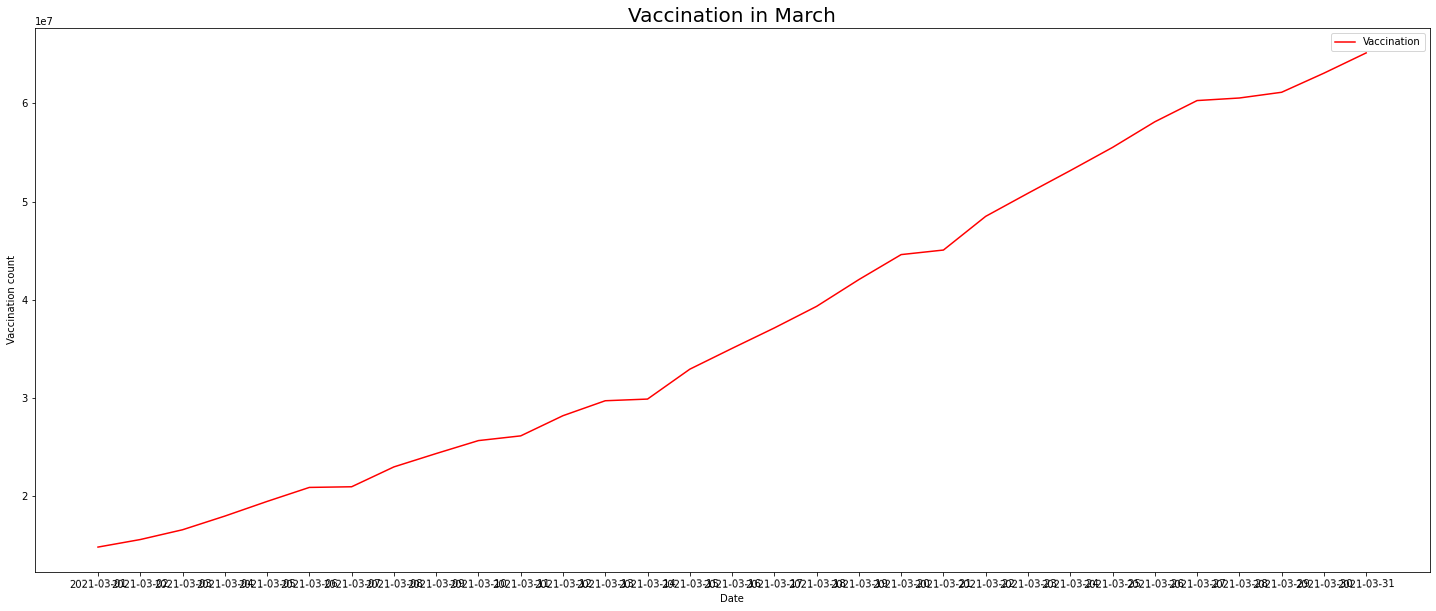

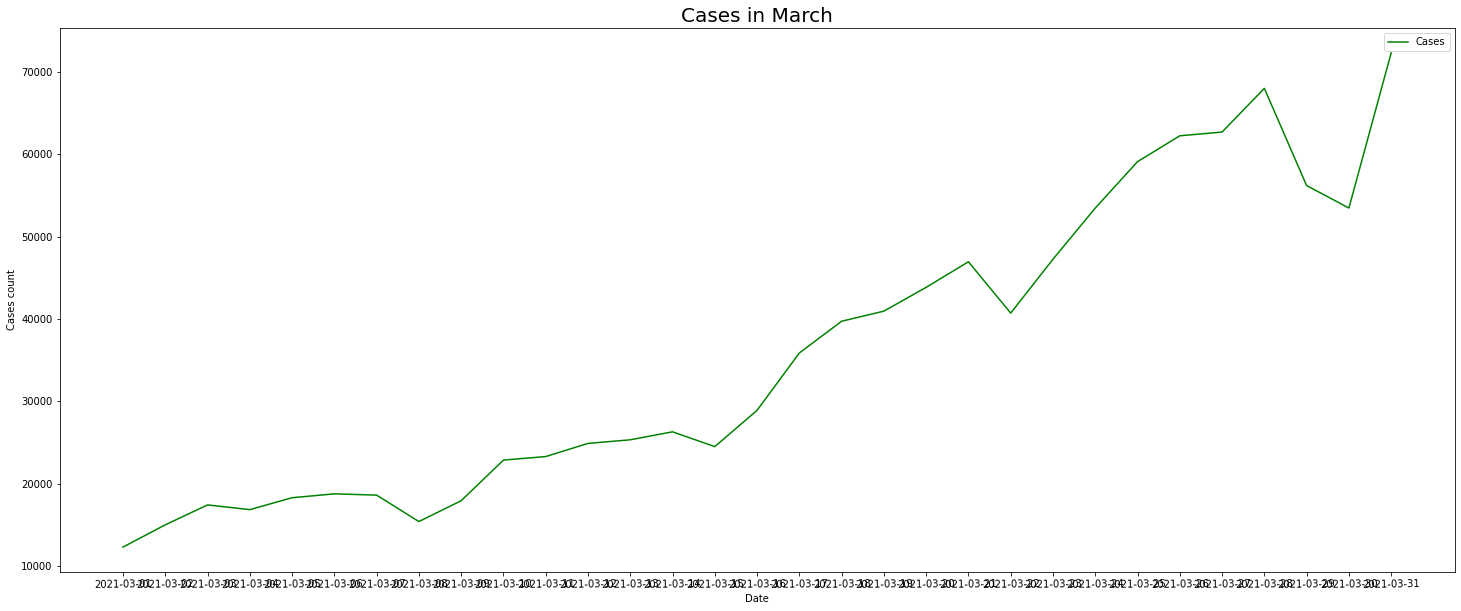

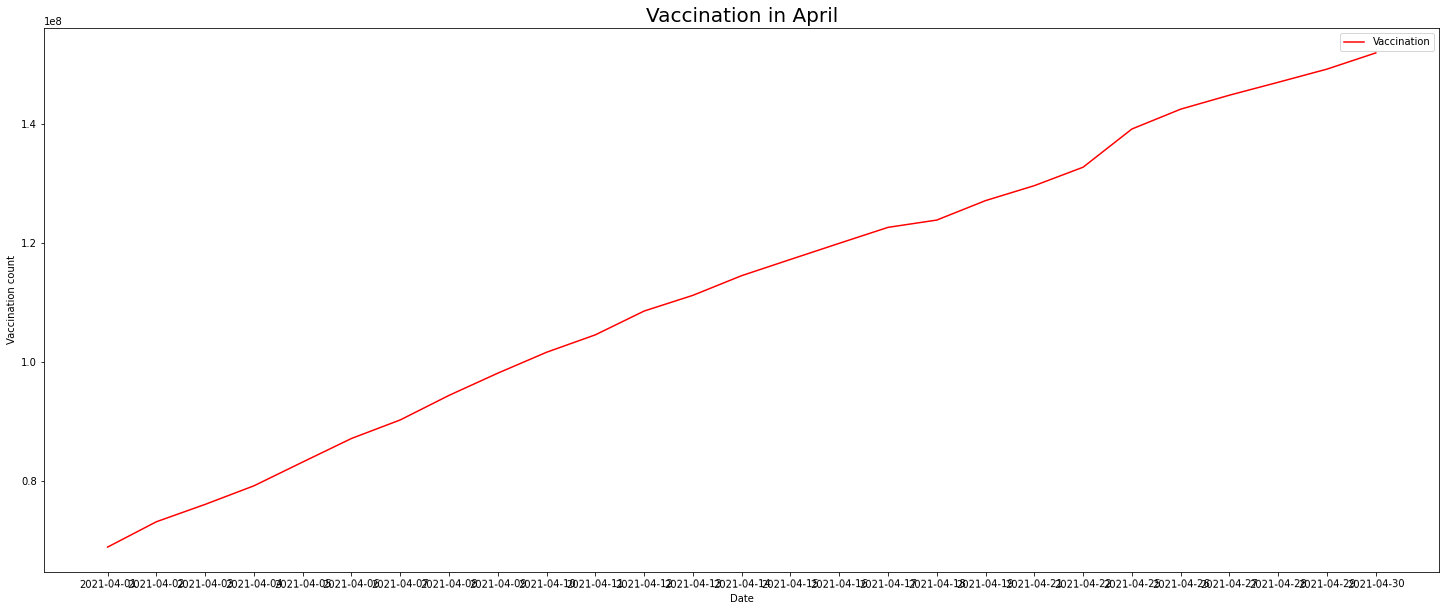

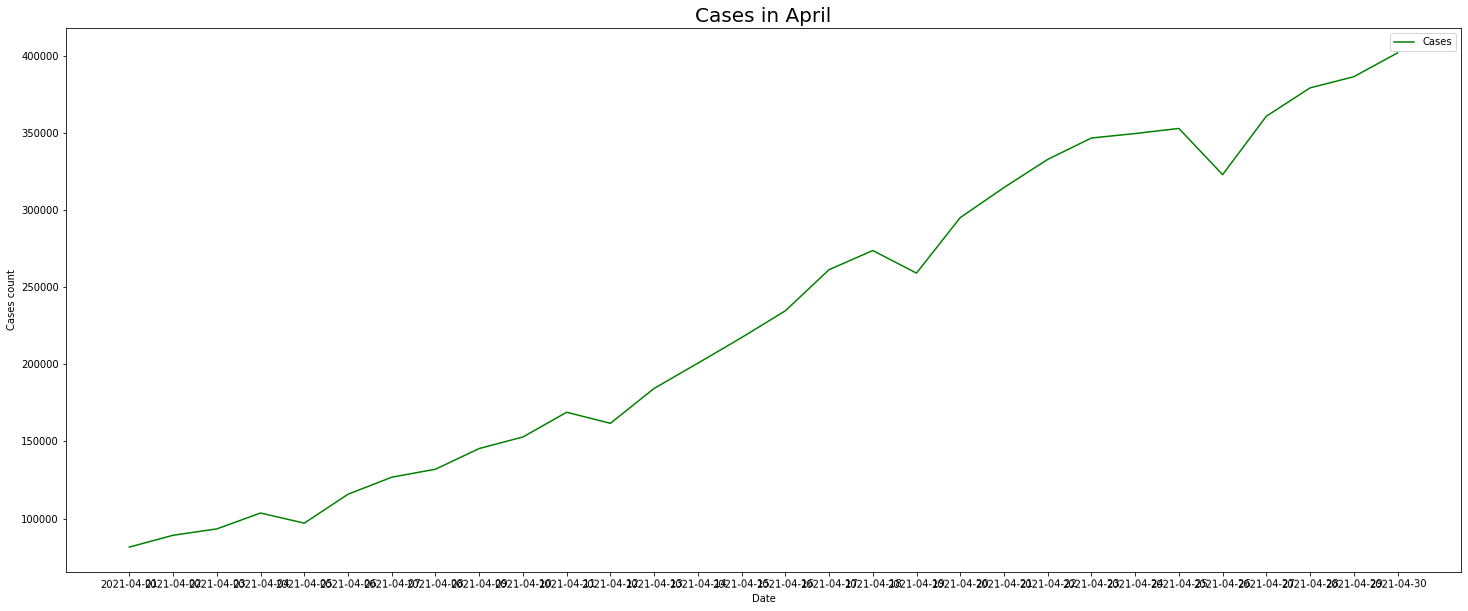

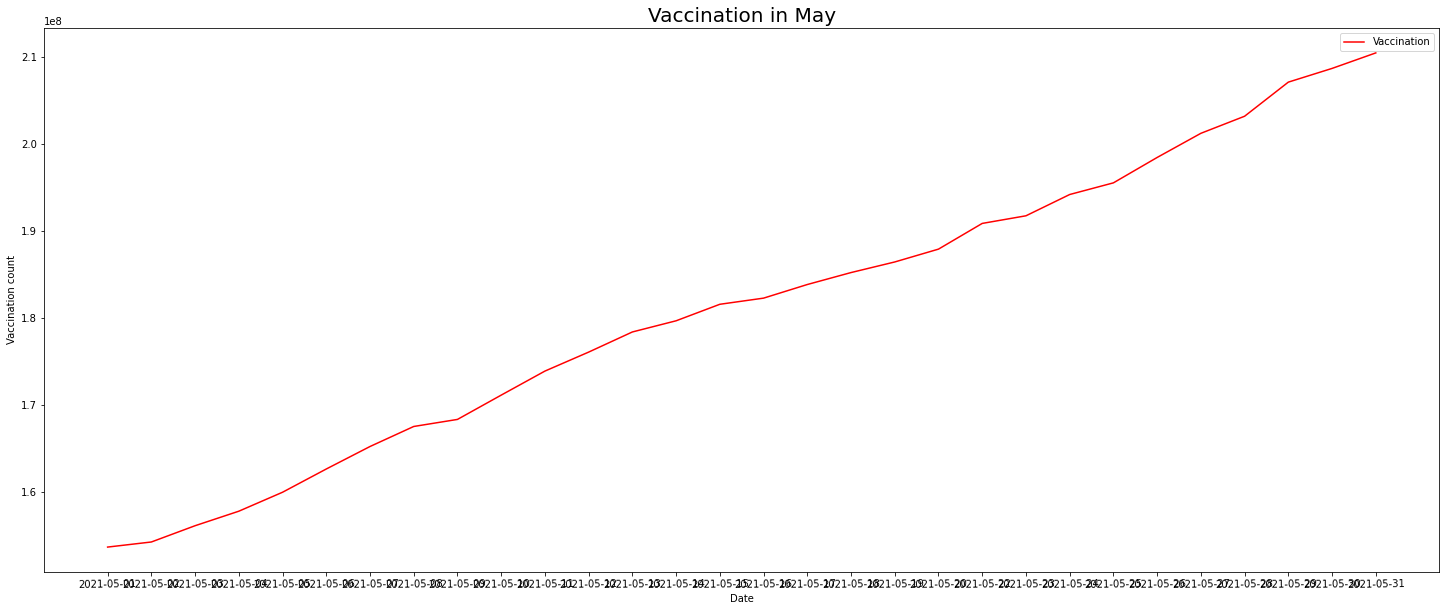

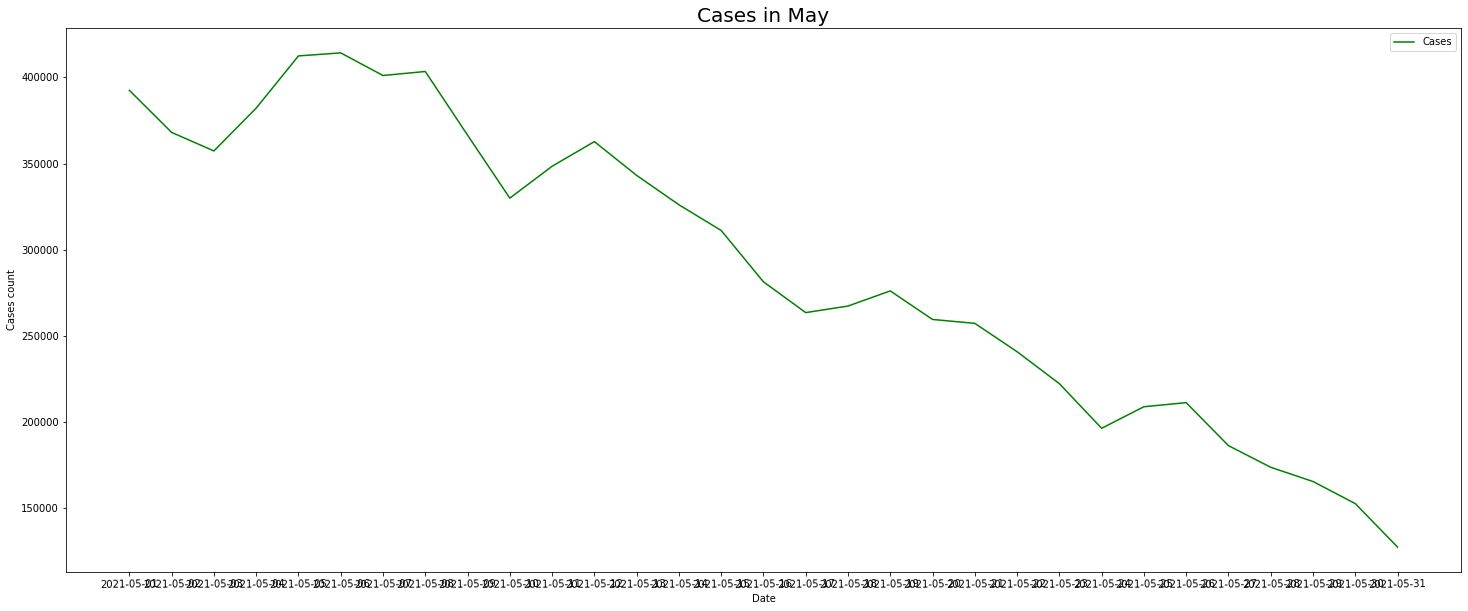

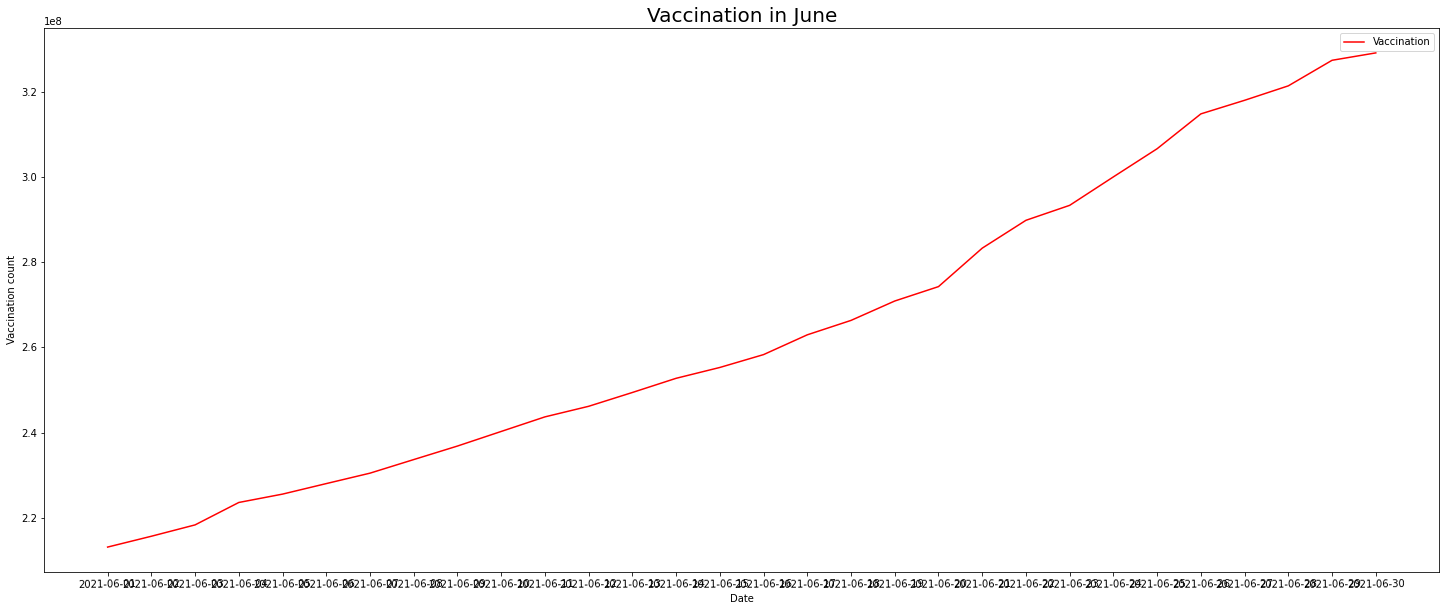

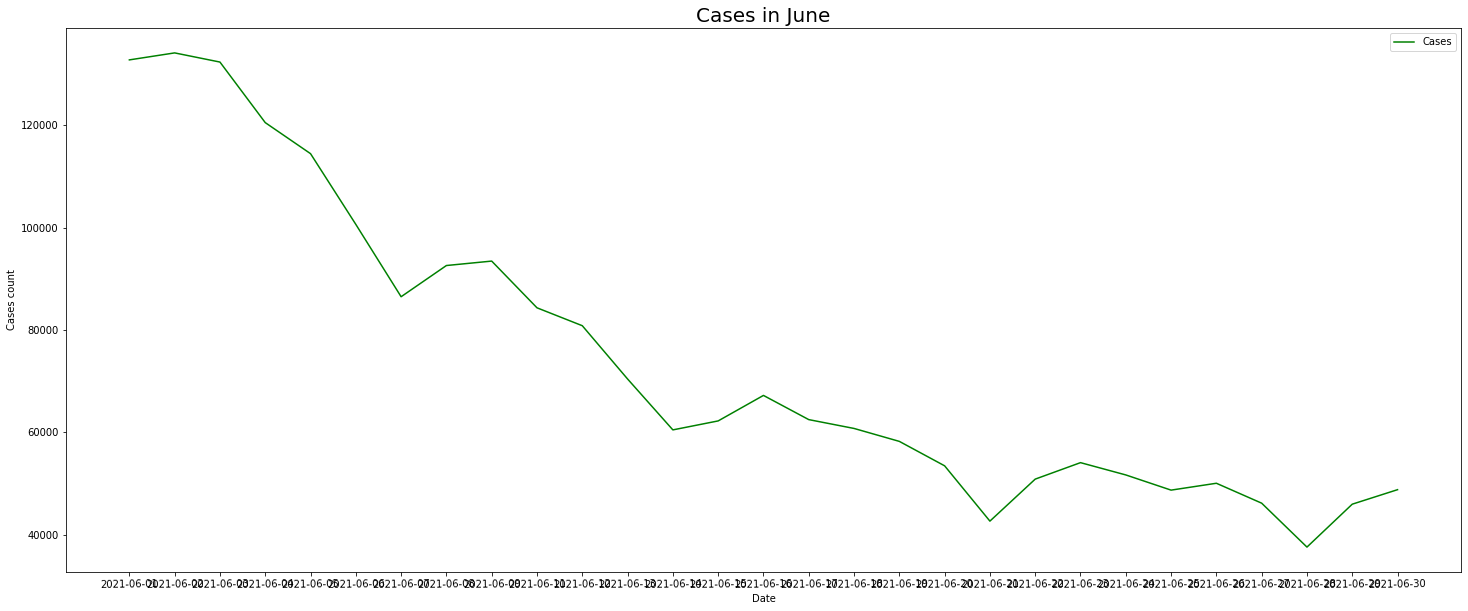

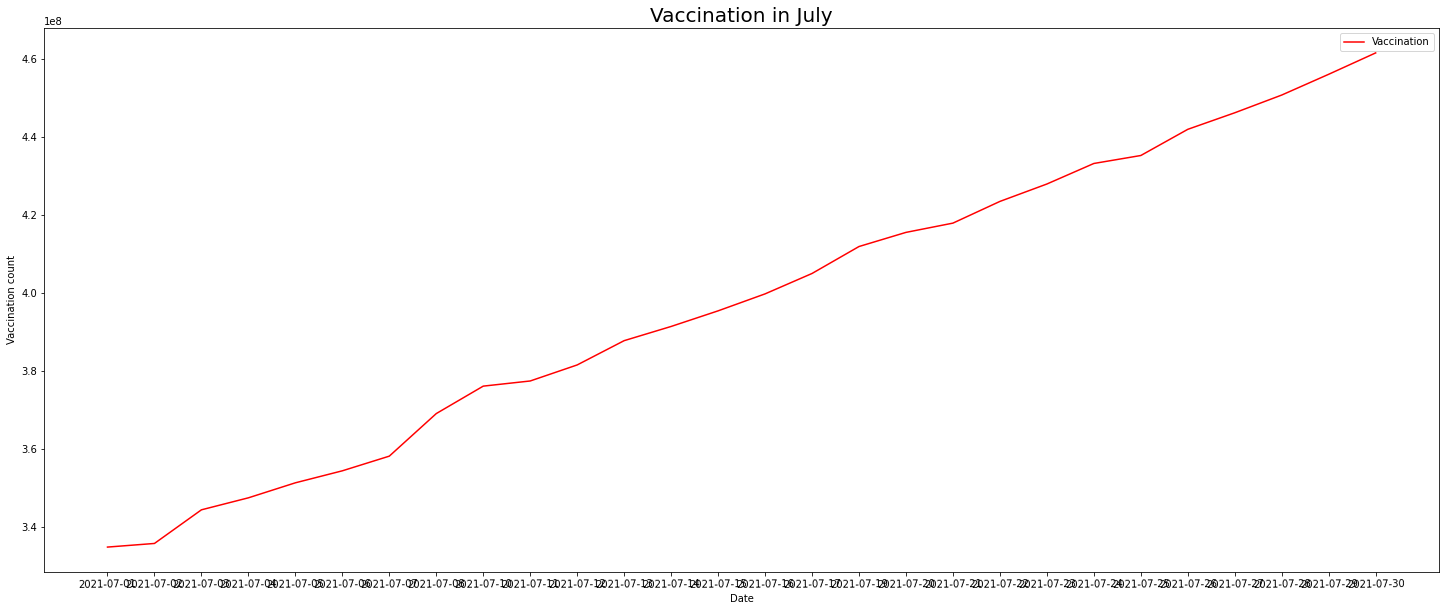

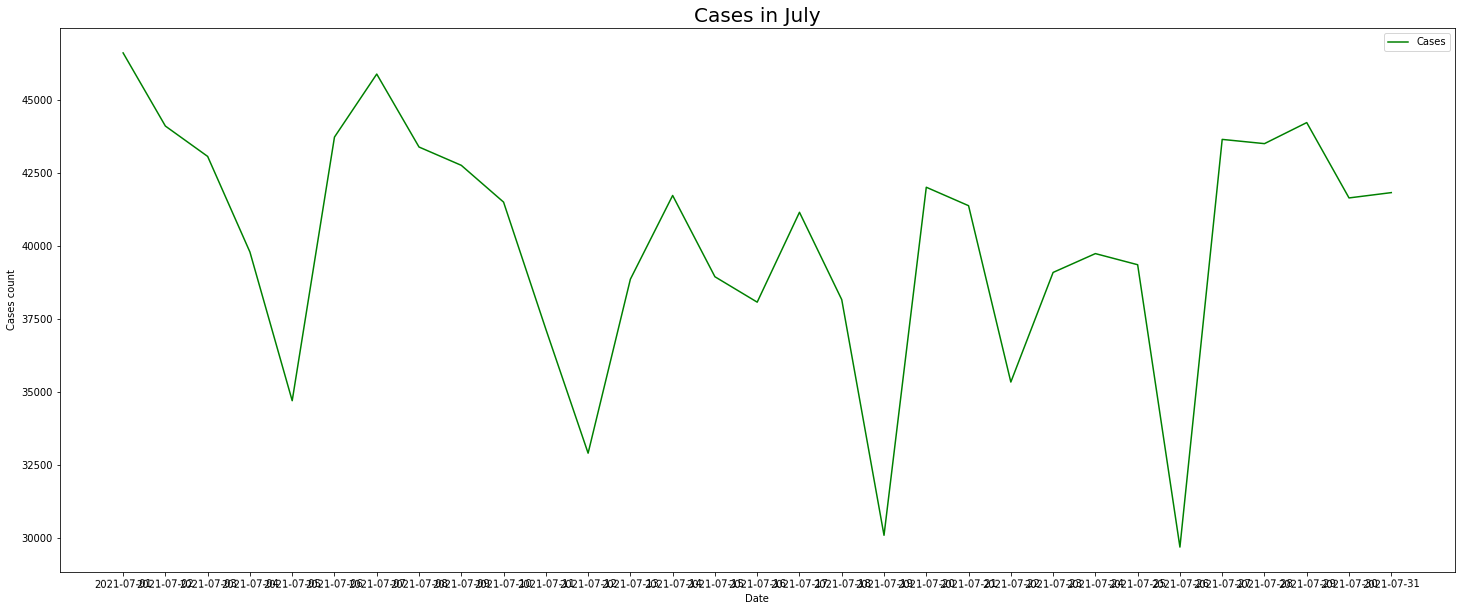

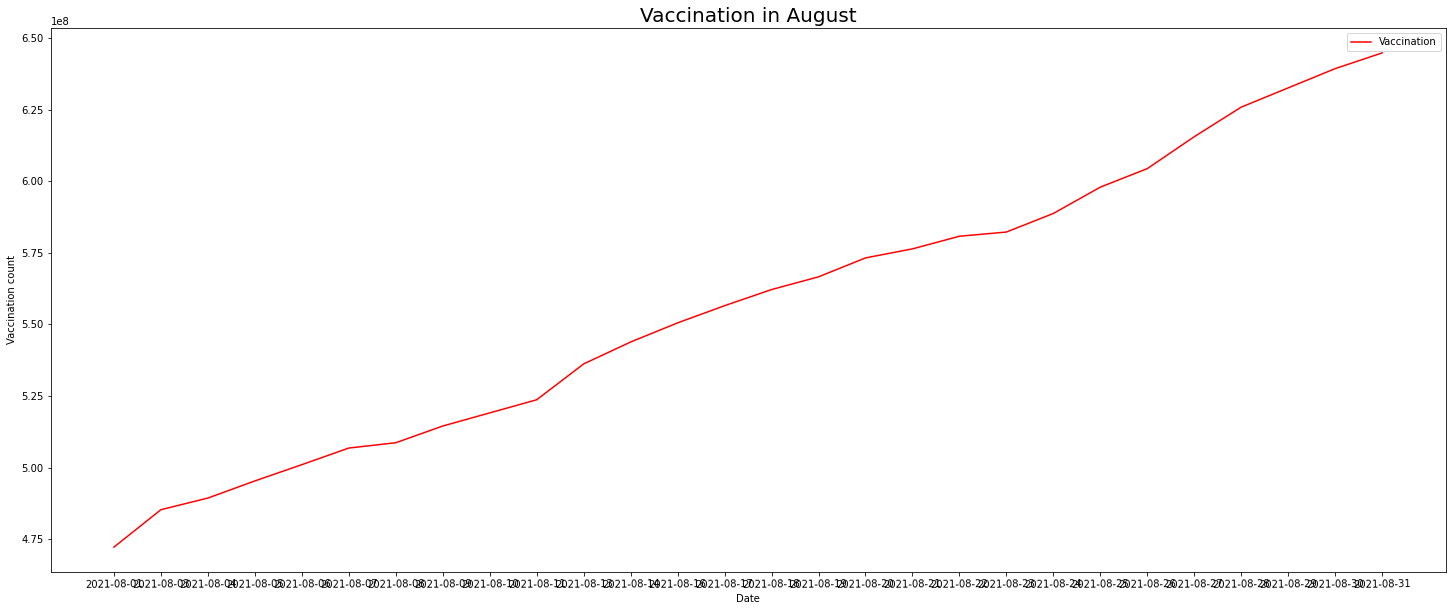

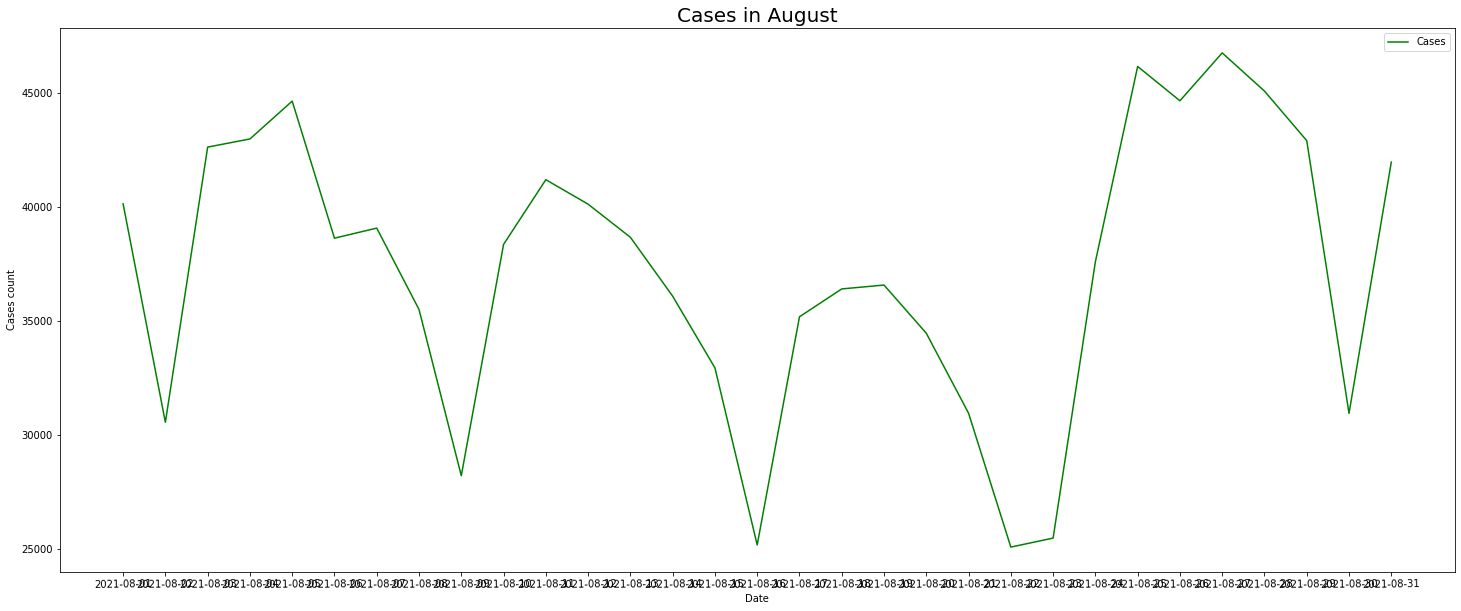

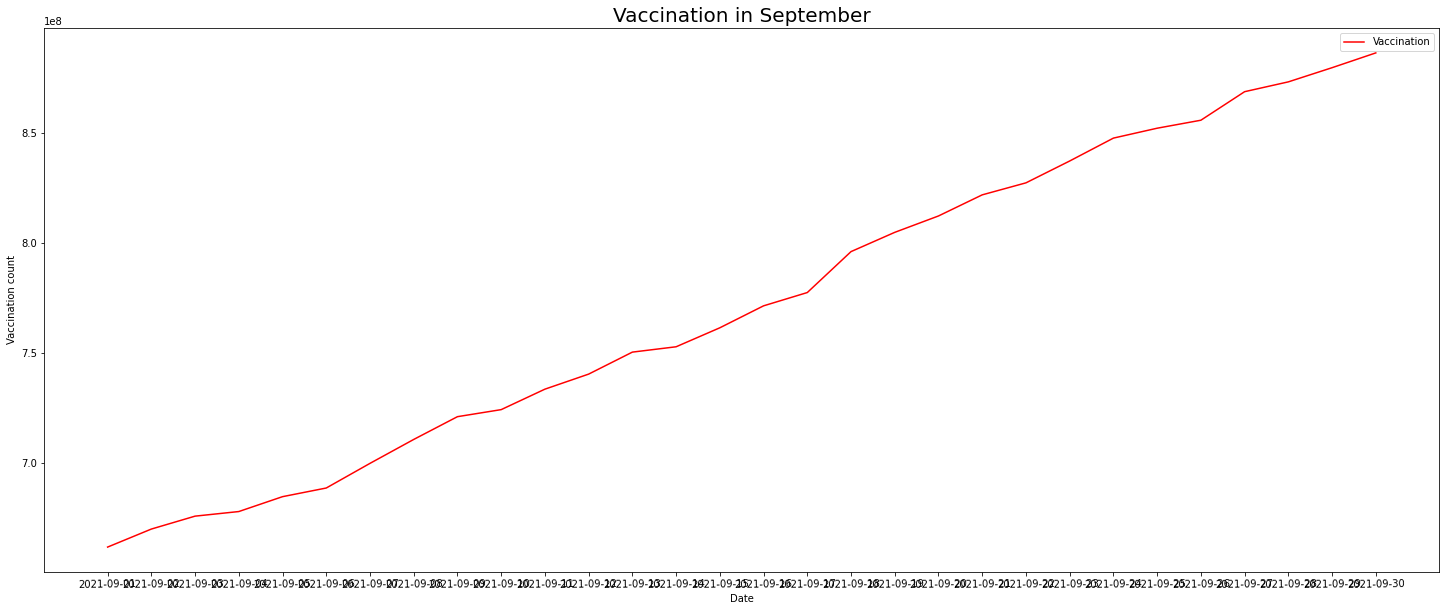

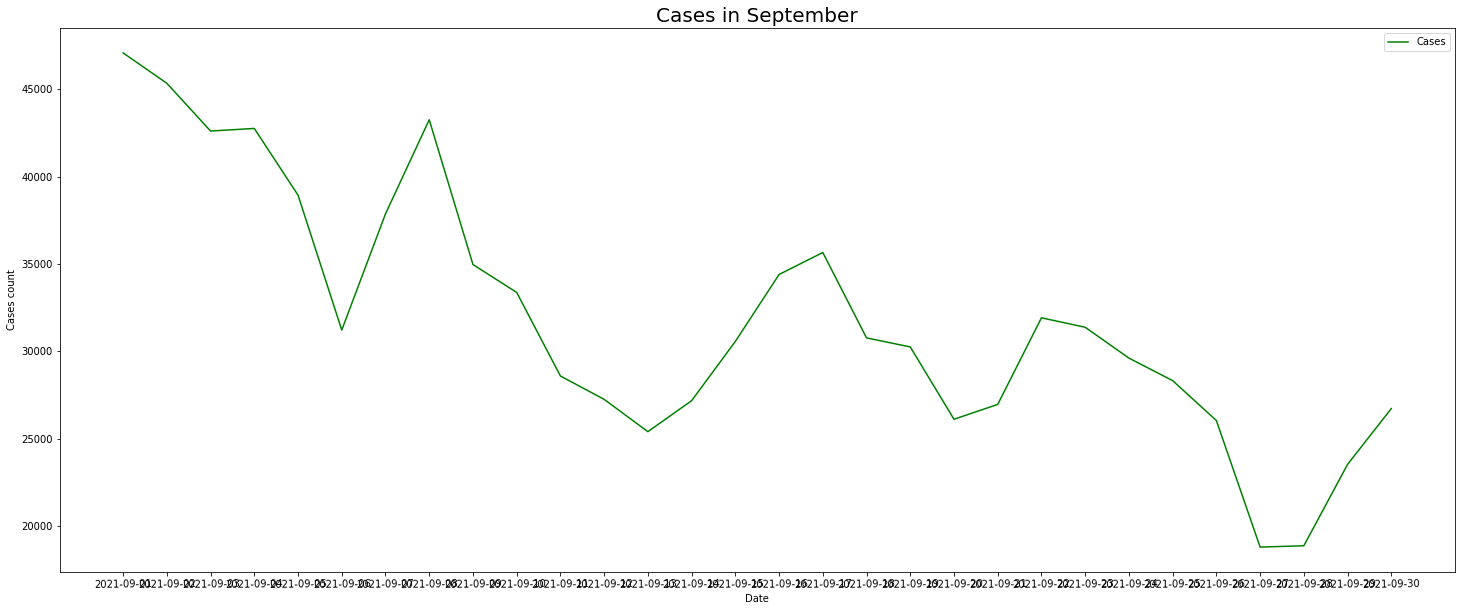

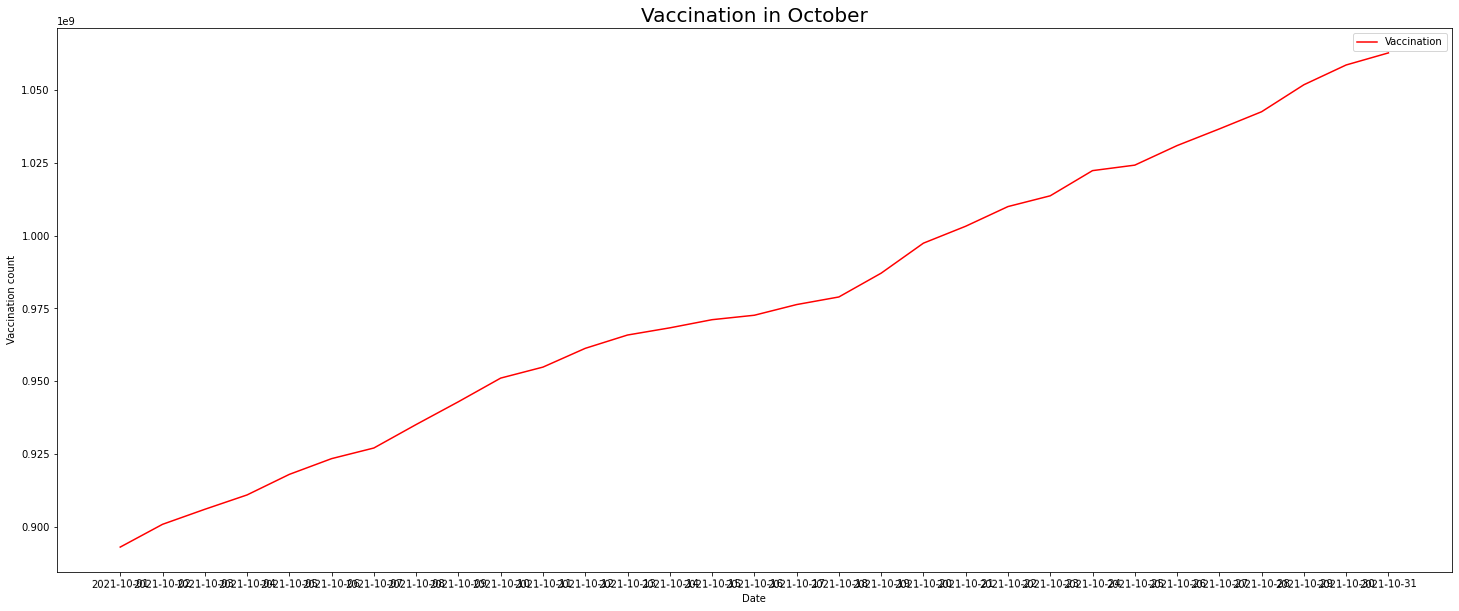

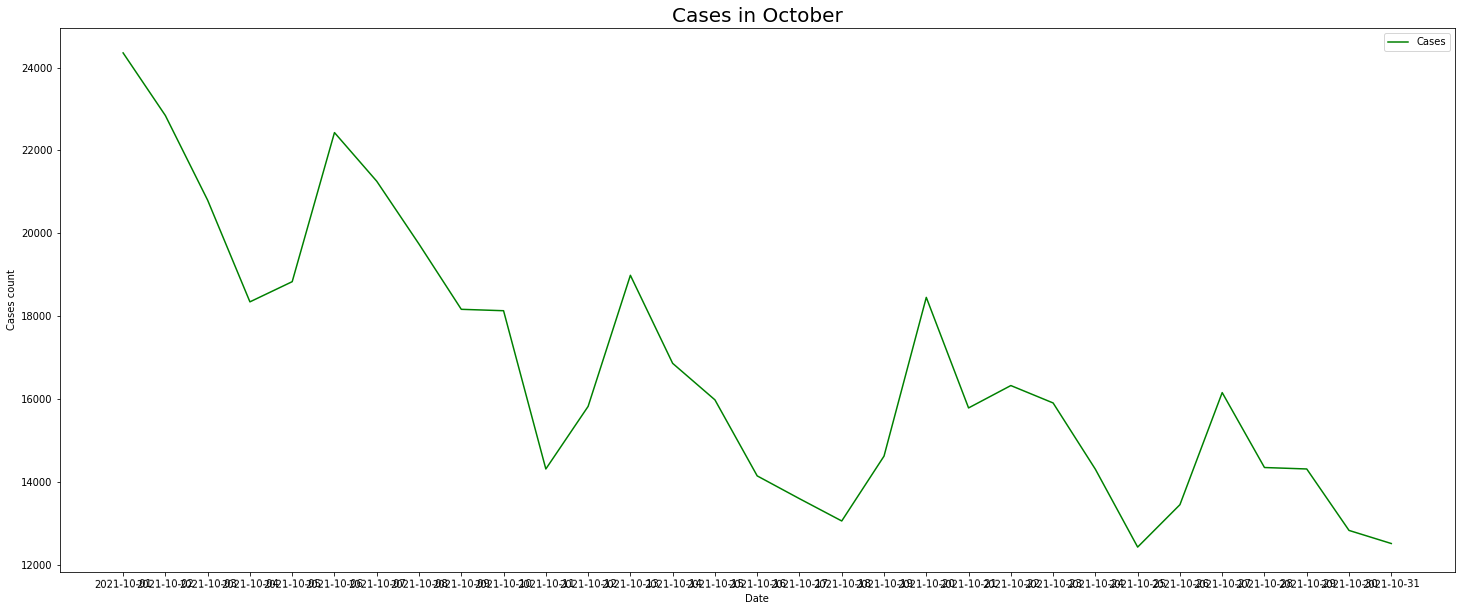

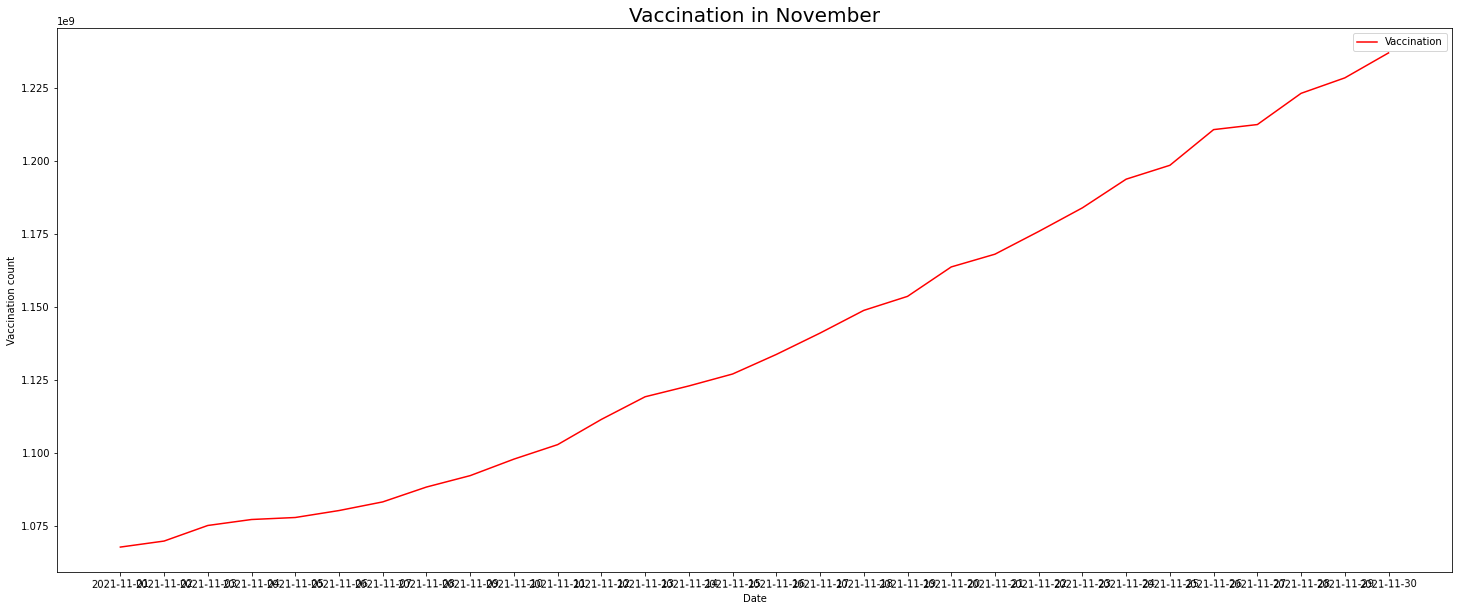

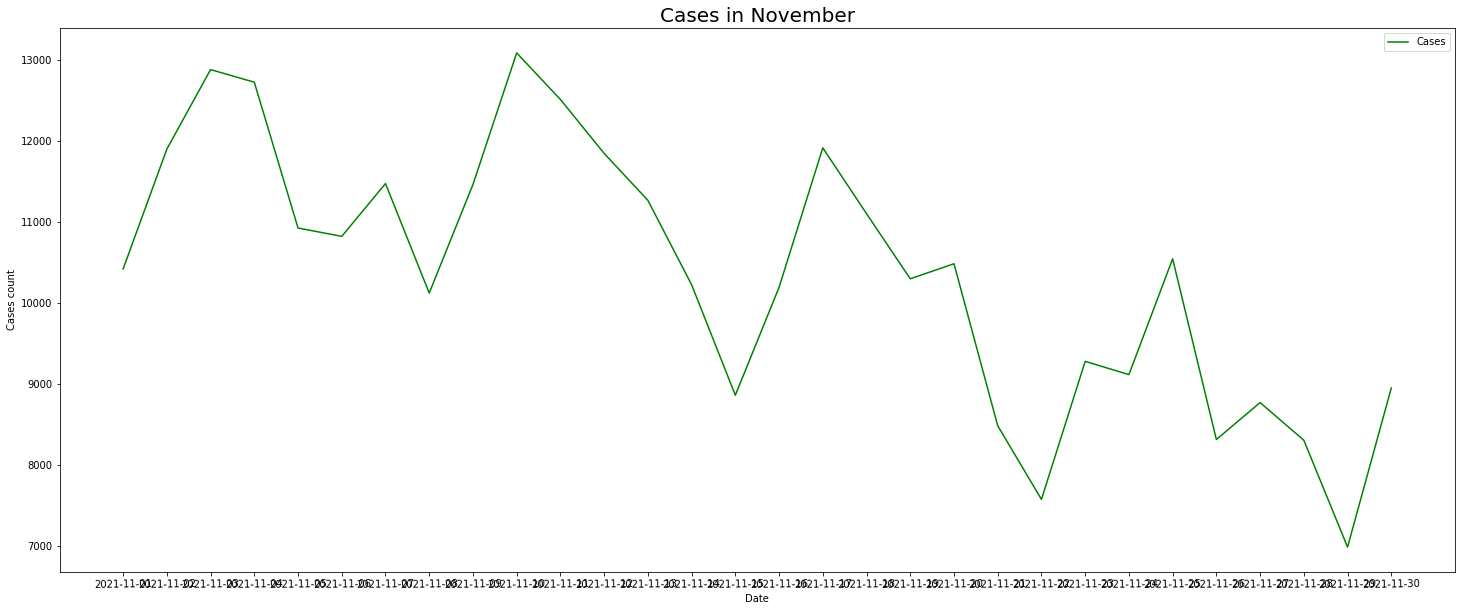

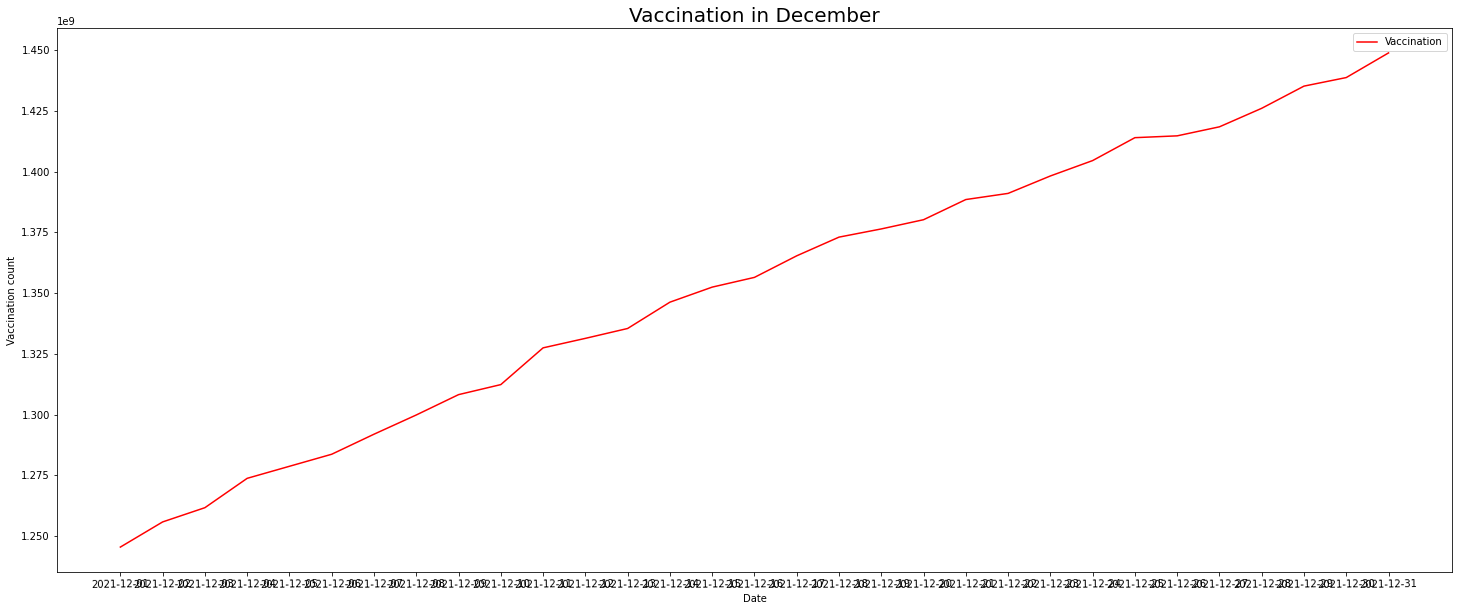

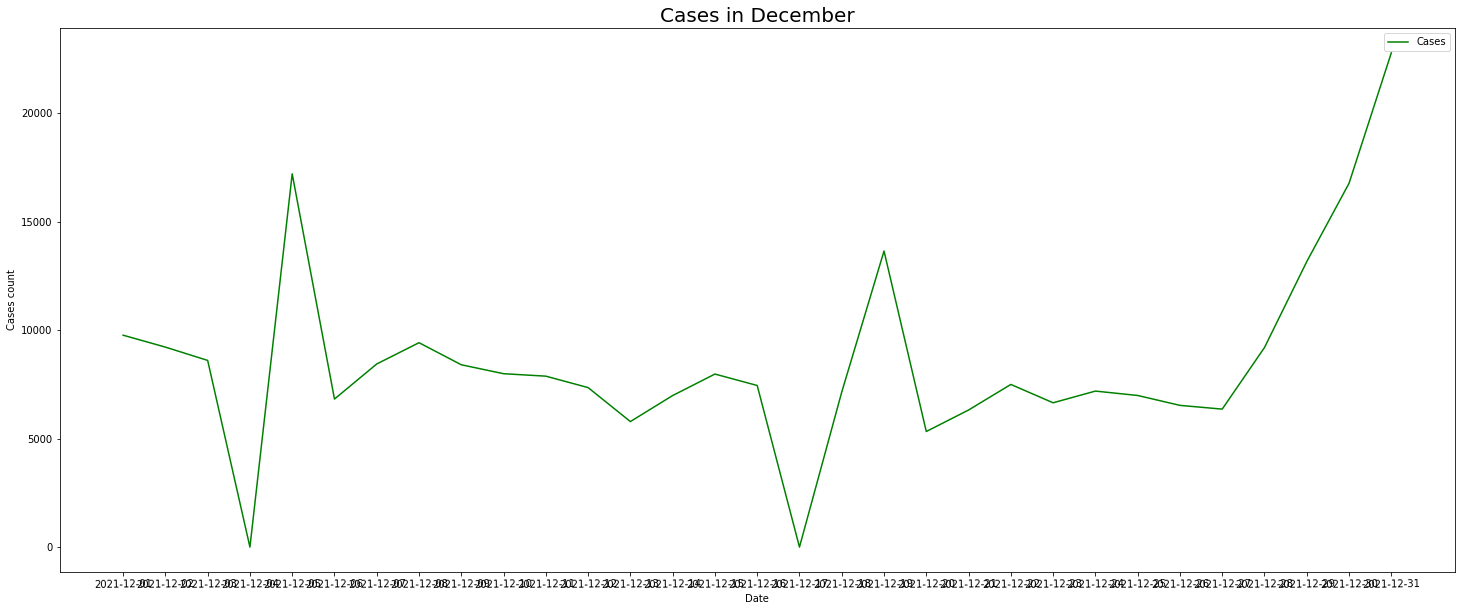

In [18]:
for i in range(12):
  start_date = str(2021) + '-' + months_index[i] + '-' + str(start_days[i])
  end_date = str(2021) + '-' + months_index[i] + '-' + str(end_days[i])
  month_cases = death_df[(death_df['Day'] >= start_date) & (death_df['Day'] <= end_date)]
  month_vaccination = vaccination_df[(vaccination_df['date'] >= start_date) & (vaccination_df['date'] <= end_date)]
  draw_graph(month_vaccination['date'], month_vaccination['total_vaccinations'], 'Date', 'Vaccination count', 'Vaccination in ' + months[i], 'r', 'Vaccination')
  draw_graph(month_cases['Day'], month_cases['cases'], 'Date', 'Cases count', 'Cases in ' + months[i], 'g', 'Cases')

## Correlation

In [22]:
from scipy.stats import pearsonr

In [44]:
from scipy.stats import spearmanr


In [24]:
deaths_data = death_df[death_df['Day'].isin(vaccination_df['date'])];
deaths_data.shape[0]

442

In [29]:
vac_df_2 = vaccination_df[~vaccination_df['date'].isin(deaths_data['Day'])];
vac_df_2

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
141,India,2021-06-10,"Covaxin, Oxford/AstraZeneca",https://dashboard.cowin.gov.in/,240281903,194325996,45955907,NaN


In [31]:
vac_df_2 = vaccination_df.drop(141)

#### Deaths overall

In [33]:
corr, _ = pearsonr(deaths_data['deaths'], vac_df_2['total_vaccinations'])

In [34]:
print(corr)

-0.3305401810491085


In [49]:
corr, _ = spearmanr(deaths_data['deaths'], vac_df_2['total_vaccinations'])

In [50]:
print(corr)

-0.14801161865792553


#### Cases overall

In [35]:
corr, _ = pearsonr(deaths_data['cases'], vac_df_2['total_vaccinations'])

In [36]:
print(corr)

-0.1931560058216403


In [51]:
corr, _ = spearmanr(deaths_data['cases'], vac_df_2['total_vaccinations'])

In [52]:
print(corr)

-0.3671007119361531


### Deaths vs vaccination first half of 2021

In [37]:
deaths_data_first_half = deaths_data[deaths_data['Day'] <= '2021-06-30']
vaccination_data_first_half = vac_df_2[vac_df_2['date'] <= '2021-06-30']

In [38]:
corr, _ = pearsonr(deaths_data_first_half['deaths'], vaccination_data_first_half['total_vaccinations'])

In [39]:
print(corr)

0.6960643712306012


In [53]:
corr, _ = spearmanr(deaths_data_first_half['deaths'], vaccination_data_first_half['total_vaccinations'])

In [54]:
print(corr)

0.8024787656353682


### Cases vs vaccination first half of 2021

In [45]:
corr, _ = pearsonr(deaths_data_first_half['cases'], vaccination_data_first_half['total_vaccinations'])

In [46]:
print(corr)

0.43310270156953545


In [58]:
corr, _ = spearmanr(deaths_data_first_half['cases'], vaccination_data_first_half['total_vaccinations'])

In [59]:
print(corr)

0.7092736369910284


### Deaths vs vaccination second half of 2021

In [40]:
deaths_data_second_half = deaths_data[(deaths_data['Day'] >= '2021-06-30') & (deaths_data['Day'] <= '2021-12-31')]
vaccination_data_second_half = vac_df_2[(vac_df_2['date'] >= '2021-06-30') & (vac_df_2['date'] <= '2021-12-31')]

In [42]:
corr, _ = pearsonr(deaths_data_second_half['deaths'], vaccination_data_second_half['total_vaccinations'])

In [43]:
print(corr)

-0.2981793580260206


In [60]:
corr, _ = spearmanr(deaths_data_second_half['deaths'], vaccination_data_second_half['total_vaccinations'])

In [61]:
print(corr)

-0.4926993878836145


### Cases vs vaccination second half of 2021

In [47]:
corr, _ = pearsonr(deaths_data_second_half['cases'], vaccination_data_second_half['total_vaccinations'])

In [48]:
print(corr)

-0.9187476925083607


In [62]:
corr, _ = spearmanr(deaths_data_second_half['cases'], vaccination_data_second_half['total_vaccinations'])

In [63]:
print(corr)

-0.9166634409473359
